In [1]:
import os,time,sys
import matplotlib.pyplot as plt 
import numpy as np
from charon import propa
from charon import profile
import charon.physicsconstants as PC
pc = PC.PhysicsConstants()
from Spectra_functions import Spectra_extrapolate, Flux_interpolation, Signal_PDF
from scipy.interpolate import splrep, splev
from ipynb.fs.full.func_plot_histo import plot_projections

Initial Flux Loading: /usr/local/lib/python3.10/dist-packages/charon-0.1.0-py3.10.egg/charon/data/SpectraEW.hdf5
Initial Flux Loading: /usr/local/lib/python3.10/dist-packages/charon-0.1.0-py3.10.egg/charon/data/SpectraEW.hdf5
Initial Flux Loading: /usr/local/lib/python3.10/dist-packages/charon-0.1.0-py3.10.egg/charon/data/SpectraEW.hdf5
Initial Flux Loading: /usr/local/lib/python3.10/dist-packages/charon-0.1.0-py3.10.egg/charon/data/SpectraEW.hdf5


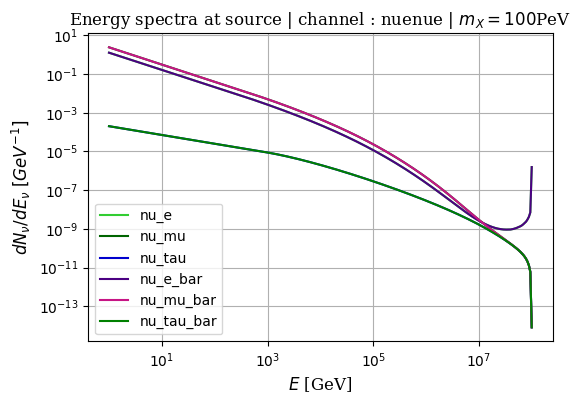

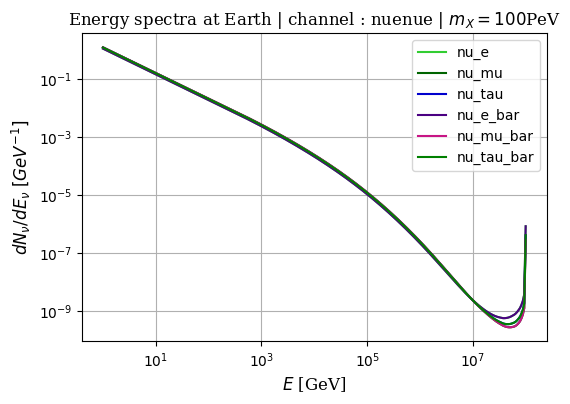

In [2]:
Flux_nue_source = Spectra_extrapolate(mass=1e8, channel = 'nuenue', process="ann", source=True)
Flux_nue_osc = Spectra_extrapolate(mass=1e8, channel = 'nuenue', process="ann", source=False)

Initial Flux Loading: /usr/local/lib/python3.10/dist-packages/charon-0.1.0-py3.10.egg/charon/data/SpectraEW.hdf5
Initial Flux Loading: /usr/local/lib/python3.10/dist-packages/charon-0.1.0-py3.10.egg/charon/data/SpectraEW.hdf5
Initial Flux Loading: /usr/local/lib/python3.10/dist-packages/charon-0.1.0-py3.10.egg/charon/data/SpectraEW.hdf5
Initial Flux Loading: /usr/local/lib/python3.10/dist-packages/charon-0.1.0-py3.10.egg/charon/data/SpectraEW.hdf5


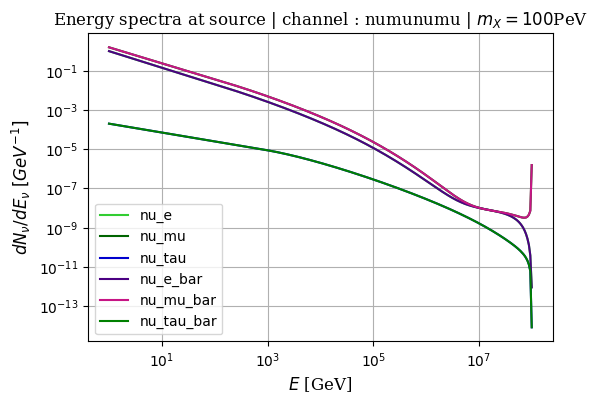

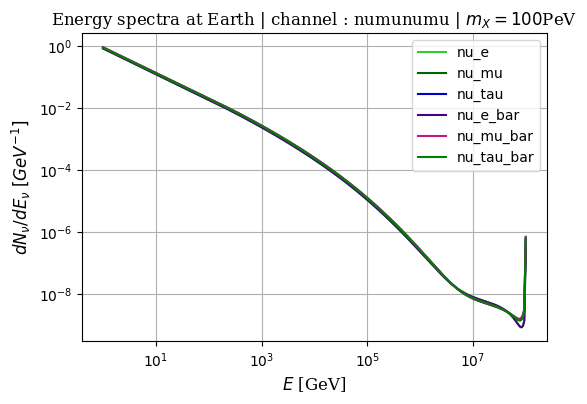

In [3]:
Flux_numu_source = Spectra_extrapolate(mass=1e8, channel = 'numunumu', process="ann", source=True)
Flux_numu_osc = Spectra_extrapolate(mass=1e8, channel = 'numunumu', process="ann", source=False)

Initial Flux Loading: /usr/local/lib/python3.10/dist-packages/charon-0.1.0-py3.10.egg/charon/data/SpectraEW.hdf5
Initial Flux Loading: /usr/local/lib/python3.10/dist-packages/charon-0.1.0-py3.10.egg/charon/data/SpectraEW.hdf5
Initial Flux Loading: /usr/local/lib/python3.10/dist-packages/charon-0.1.0-py3.10.egg/charon/data/SpectraEW.hdf5
Initial Flux Loading: /usr/local/lib/python3.10/dist-packages/charon-0.1.0-py3.10.egg/charon/data/SpectraEW.hdf5


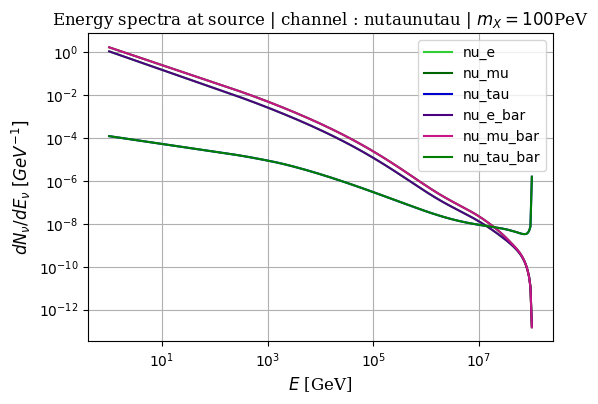

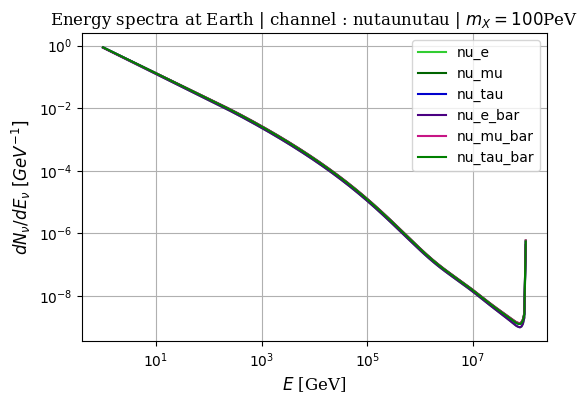

In [4]:
Flux_nutau_source = Spectra_extrapolate(mass=1e8, channel = 'nutaunutau', process="ann", source=True)
Flux_nutau_osc = Spectra_extrapolate(mass=1e8, channel = 'nutaunutau', process="ann", source=False)

In [5]:
Reco_rate_nue_NFW1 = Signal_PDF(mass=1e6, channel='nuenue',  process='ann', extrapolation=False, galactic_profile=profile.NFW, normalize=True)
Reco_rate_nue_Burkert1 = Signal_PDF(mass=1e6, channel='nuenue',  process='ann', extrapolation=False, galactic_profile=profile.Burkert, normalize=True)

Initial Flux Loading: /usr/local/lib/python3.10/dist-packages/charon-0.1.0-py3.10.egg/charon/data/SpectraEW.hdf5
Initial Flux Loading: /usr/local/lib/python3.10/dist-packages/charon-0.1.0-py3.10.egg/charon/data/SpectraEW.hdf5
Initial Flux Loading: /usr/local/lib/python3.10/dist-packages/charon-0.1.0-py3.10.egg/charon/data/SpectraEW.hdf5
Initial Flux Loading: /usr/local/lib/python3.10/dist-packages/charon-0.1.0-py3.10.egg/charon/data/SpectraEW.hdf5


In [6]:
Reco_rate_numu_NFW1 = Signal_PDF(mass=1e6, channel='numunumu',  process='ann', extrapolation=False, galactic_profile=profile.NFW, normalize=True)
Reco_rate_numu_Burkert1 = Signal_PDF(mass=1e6, channel='numunumu',  process='ann', extrapolation=False, galactic_profile=profile.Burkert, normalize=True)

Initial Flux Loading: /usr/local/lib/python3.10/dist-packages/charon-0.1.0-py3.10.egg/charon/data/SpectraEW.hdf5
Initial Flux Loading: /usr/local/lib/python3.10/dist-packages/charon-0.1.0-py3.10.egg/charon/data/SpectraEW.hdf5
Initial Flux Loading: /usr/local/lib/python3.10/dist-packages/charon-0.1.0-py3.10.egg/charon/data/SpectraEW.hdf5
Initial Flux Loading: /usr/local/lib/python3.10/dist-packages/charon-0.1.0-py3.10.egg/charon/data/SpectraEW.hdf5


In [7]:
Reco_rate_nutau_NFW1 = Signal_PDF(mass=1e6, channel='nutaunutau',  process='ann', extrapolation=False, galactic_profile=profile.NFW, normalize=True)
Reco_rate_nutau_Burkert1 = Signal_PDF(mass=1e6, channel='nutaunutau',  process='ann', extrapolation=False, galactic_profile=profile.Burkert, normalize=True)

Initial Flux Loading: /usr/local/lib/python3.10/dist-packages/charon-0.1.0-py3.10.egg/charon/data/SpectraEW.hdf5
Initial Flux Loading: /usr/local/lib/python3.10/dist-packages/charon-0.1.0-py3.10.egg/charon/data/SpectraEW.hdf5
Initial Flux Loading: /usr/local/lib/python3.10/dist-packages/charon-0.1.0-py3.10.egg/charon/data/SpectraEW.hdf5
Initial Flux Loading: /usr/local/lib/python3.10/dist-packages/charon-0.1.0-py3.10.egg/charon/data/SpectraEW.hdf5


In [8]:
Reco_rate_bb_NFW1 = Signal_PDF(mass=1e6, channel='bb',  process='ann', extrapolation=False, galactic_profile=profile.NFW, normalize=True)
Reco_rate_bb_Burkert1 = Signal_PDF(mass=1e6, channel='bb',  process='ann', extrapolation=False, galactic_profile=profile.Burkert, normalize=True)

Initial Flux Loading: /usr/local/lib/python3.10/dist-packages/charon-0.1.0-py3.10.egg/charon/data/SpectraEW.hdf5
Initial Flux Loading: /usr/local/lib/python3.10/dist-packages/charon-0.1.0-py3.10.egg/charon/data/SpectraEW.hdf5
Initial Flux Loading: /usr/local/lib/python3.10/dist-packages/charon-0.1.0-py3.10.egg/charon/data/SpectraEW.hdf5
Initial Flux Loading: /usr/local/lib/python3.10/dist-packages/charon-0.1.0-py3.10.egg/charon/data/SpectraEW.hdf5


Initial Flux Loading: /usr/local/lib/python3.10/dist-packages/charon-0.1.0-py3.10.egg/charon/data/SpectraEW.hdf5
Initial Flux Loading: /usr/local/lib/python3.10/dist-packages/charon-0.1.0-py3.10.egg/charon/data/SpectraEW.hdf5
Initial Flux Loading: /usr/local/lib/python3.10/dist-packages/charon-0.1.0-py3.10.egg/charon/data/SpectraEW.hdf5
Initial Flux Loading: /usr/local/lib/python3.10/dist-packages/charon-0.1.0-py3.10.egg/charon/data/SpectraEW.hdf5
Initial Flux Loading: /usr/local/lib/python3.10/dist-packages/charon-0.1.0-py3.10.egg/charon/data/SpectraEW.hdf5
Initial Flux Loading: /usr/local/lib/python3.10/dist-packages/charon-0.1.0-py3.10.egg/charon/data/SpectraEW.hdf5


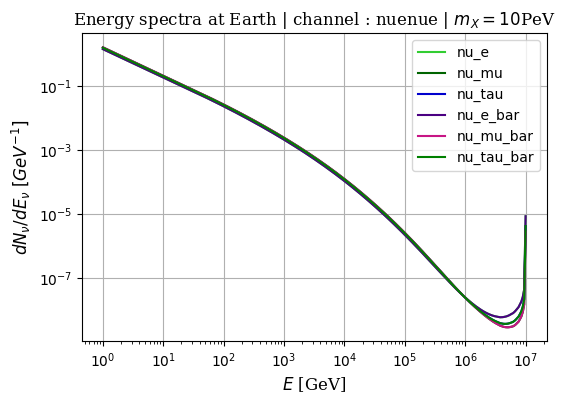

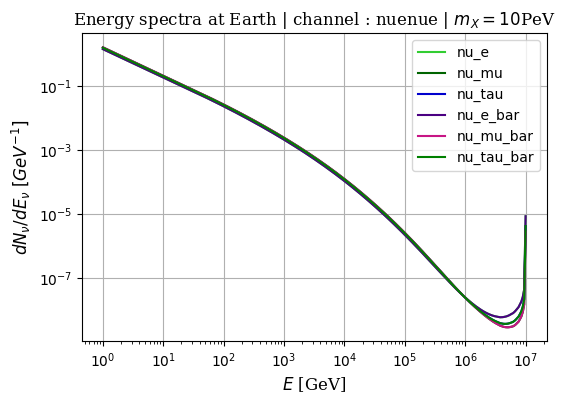

In [9]:
Reco_rate_nue_NFW = Signal_PDF(mass=1e7, channel='nuenue',  process='ann', extrapolation=True, galactic_profile=profile.NFW, normalize=True)
Reco_rate_nue_Burkert = Signal_PDF(mass=1e7, channel='nuenue',  process='ann', extrapolation=True, galactic_profile=profile.Burkert, normalize=True)

Initial Flux Loading: /usr/local/lib/python3.10/dist-packages/charon-0.1.0-py3.10.egg/charon/data/SpectraEW.hdf5
Initial Flux Loading: /usr/local/lib/python3.10/dist-packages/charon-0.1.0-py3.10.egg/charon/data/SpectraEW.hdf5
Initial Flux Loading: /usr/local/lib/python3.10/dist-packages/charon-0.1.0-py3.10.egg/charon/data/SpectraEW.hdf5
Initial Flux Loading: /usr/local/lib/python3.10/dist-packages/charon-0.1.0-py3.10.egg/charon/data/SpectraEW.hdf5
Initial Flux Loading: /usr/local/lib/python3.10/dist-packages/charon-0.1.0-py3.10.egg/charon/data/SpectraEW.hdf5
Initial Flux Loading: /usr/local/lib/python3.10/dist-packages/charon-0.1.0-py3.10.egg/charon/data/SpectraEW.hdf5


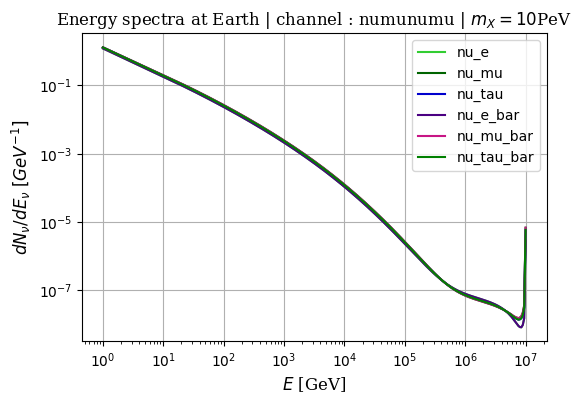

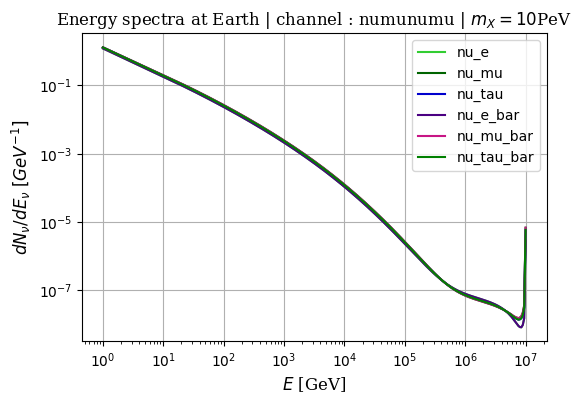

In [10]:
Reco_rate_numu_NFW = Signal_PDF(mass=1e7, channel='numunumu',  process='ann', extrapolation=True, galactic_profile=profile.NFW, normalize=True)
Reco_rate_numu_Burkert = Signal_PDF(mass=1e7, channel='numunumu',  process='ann', extrapolation=True, galactic_profile=profile.Burkert, normalize=True)

Initial Flux Loading: /usr/local/lib/python3.10/dist-packages/charon-0.1.0-py3.10.egg/charon/data/SpectraEW.hdf5
Initial Flux Loading: /usr/local/lib/python3.10/dist-packages/charon-0.1.0-py3.10.egg/charon/data/SpectraEW.hdf5
Initial Flux Loading: /usr/local/lib/python3.10/dist-packages/charon-0.1.0-py3.10.egg/charon/data/SpectraEW.hdf5
Initial Flux Loading: /usr/local/lib/python3.10/dist-packages/charon-0.1.0-py3.10.egg/charon/data/SpectraEW.hdf5
Initial Flux Loading: /usr/local/lib/python3.10/dist-packages/charon-0.1.0-py3.10.egg/charon/data/SpectraEW.hdf5
Initial Flux Loading: /usr/local/lib/python3.10/dist-packages/charon-0.1.0-py3.10.egg/charon/data/SpectraEW.hdf5


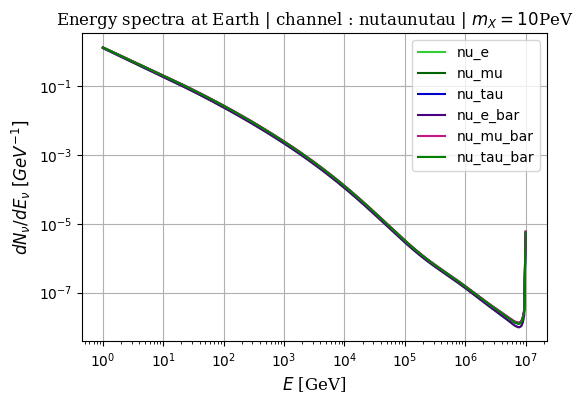

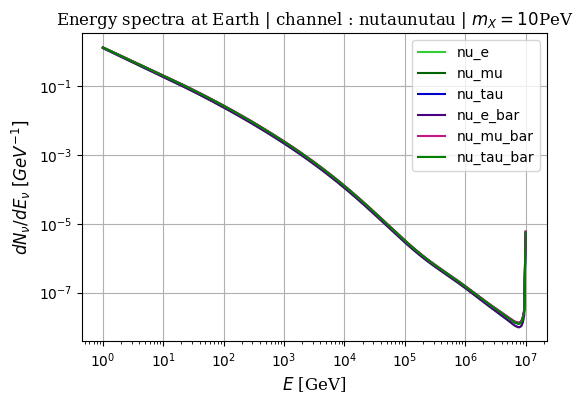

In [11]:
Reco_rate_nutau_NFW = Signal_PDF(mass=1e7, channel='nutaunutau',  process='ann', extrapolation=True, galactic_profile=profile.NFW, normalize=True)
Reco_rate_nutau_Burkert = Signal_PDF(mass=1e7, channel='nutaunutau',  process='ann', extrapolation=True, galactic_profile=profile.Burkert, normalize=True)

Initial Flux Loading: /usr/local/lib/python3.10/dist-packages/charon-0.1.0-py3.10.egg/charon/data/SpectraEW.hdf5
Initial Flux Loading: /usr/local/lib/python3.10/dist-packages/charon-0.1.0-py3.10.egg/charon/data/SpectraEW.hdf5
Initial Flux Loading: /usr/local/lib/python3.10/dist-packages/charon-0.1.0-py3.10.egg/charon/data/SpectraEW.hdf5
Initial Flux Loading: /usr/local/lib/python3.10/dist-packages/charon-0.1.0-py3.10.egg/charon/data/SpectraEW.hdf5
Initial Flux Loading: /usr/local/lib/python3.10/dist-packages/charon-0.1.0-py3.10.egg/charon/data/SpectraEW.hdf5
Initial Flux Loading: /usr/local/lib/python3.10/dist-packages/charon-0.1.0-py3.10.egg/charon/data/SpectraEW.hdf5


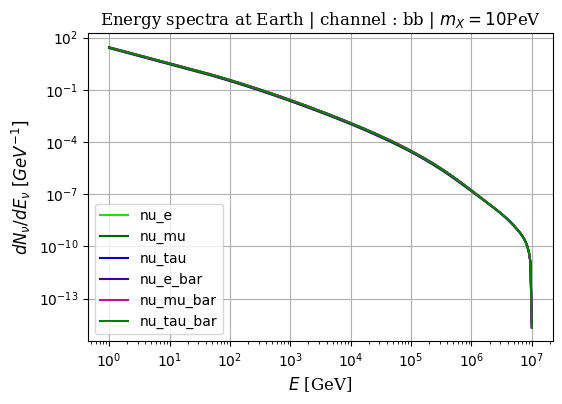

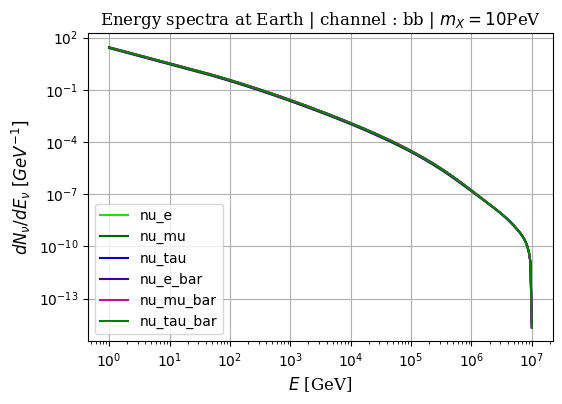

In [12]:
Reco_rate_bb_NFW = Signal_PDF(mass=1e7, channel='bb',  process='ann', extrapolation=True, galactic_profile=profile.NFW, normalize=True)
Reco_rate_bb_Burkert = Signal_PDF(mass=1e7, channel='bb',  process='ann', extrapolation=True, galactic_profile=profile.Burkert, normalize=True)

Initial Flux Loading: /usr/local/lib/python3.10/dist-packages/charon-0.1.0-py3.10.egg/charon/data/SpectraEW.hdf5
Initial Flux Loading: /usr/local/lib/python3.10/dist-packages/charon-0.1.0-py3.10.egg/charon/data/SpectraEW.hdf5
Initial Flux Loading: /usr/local/lib/python3.10/dist-packages/charon-0.1.0-py3.10.egg/charon/data/SpectraEW.hdf5
Initial Flux Loading: /usr/local/lib/python3.10/dist-packages/charon-0.1.0-py3.10.egg/charon/data/SpectraEW.hdf5
Initial Flux Loading: /usr/local/lib/python3.10/dist-packages/charon-0.1.0-py3.10.egg/charon/data/SpectraEW.hdf5
Initial Flux Loading: /usr/local/lib/python3.10/dist-packages/charon-0.1.0-py3.10.egg/charon/data/SpectraEW.hdf5


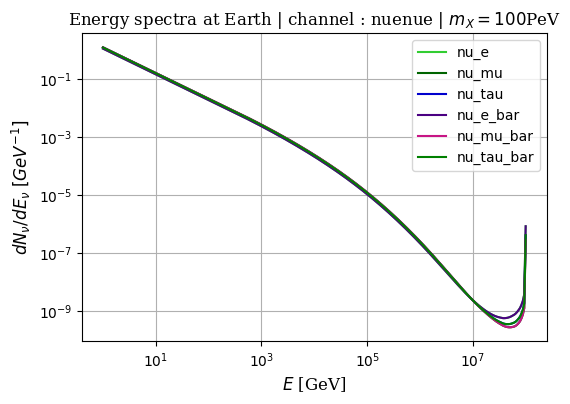

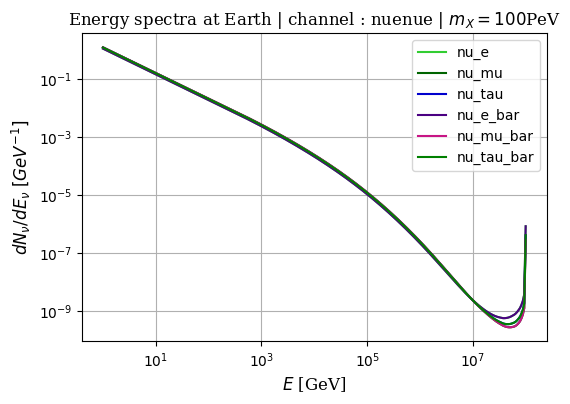

In [13]:
Reco_rate_nue_NFW100 = Signal_PDF(mass=1e8, channel='nuenue',  process='ann', extrapolation=True, galactic_profile=profile.NFW, normalize=True)
Reco_rate_nue_Burkert100 = Signal_PDF(mass=1e8, channel='nuenue',  process='ann', extrapolation=True, galactic_profile=profile.Burkert, normalize=True)

Initial Flux Loading: /usr/local/lib/python3.10/dist-packages/charon-0.1.0-py3.10.egg/charon/data/SpectraEW.hdf5
Initial Flux Loading: /usr/local/lib/python3.10/dist-packages/charon-0.1.0-py3.10.egg/charon/data/SpectraEW.hdf5
Initial Flux Loading: /usr/local/lib/python3.10/dist-packages/charon-0.1.0-py3.10.egg/charon/data/SpectraEW.hdf5
Initial Flux Loading: /usr/local/lib/python3.10/dist-packages/charon-0.1.0-py3.10.egg/charon/data/SpectraEW.hdf5
Initial Flux Loading: /usr/local/lib/python3.10/dist-packages/charon-0.1.0-py3.10.egg/charon/data/SpectraEW.hdf5
Initial Flux Loading: /usr/local/lib/python3.10/dist-packages/charon-0.1.0-py3.10.egg/charon/data/SpectraEW.hdf5


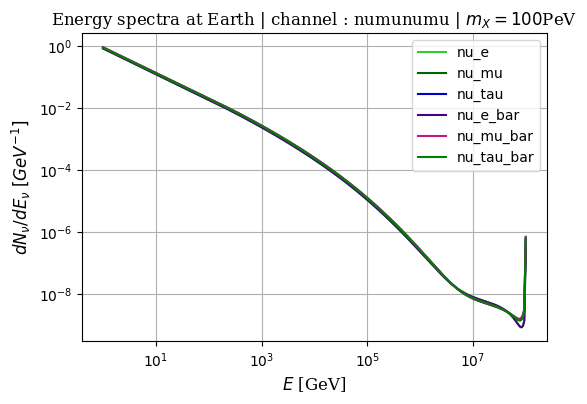

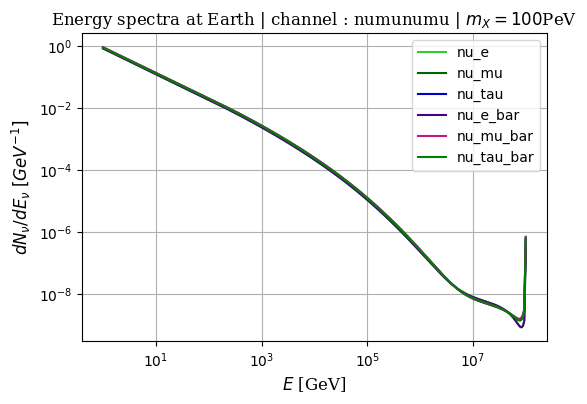

In [14]:
Reco_rate_numu_NFW100 = Signal_PDF(mass=1e8, channel='numunumu',  process='ann', extrapolation=True, galactic_profile=profile.NFW, normalize=True)
Reco_rate_numu_Burkert100 = Signal_PDF(mass=1e8, channel='numunumu',  process='ann', extrapolation=True, galactic_profile=profile.Burkert, normalize=True)

Initial Flux Loading: /usr/local/lib/python3.10/dist-packages/charon-0.1.0-py3.10.egg/charon/data/SpectraEW.hdf5
Initial Flux Loading: /usr/local/lib/python3.10/dist-packages/charon-0.1.0-py3.10.egg/charon/data/SpectraEW.hdf5
Initial Flux Loading: /usr/local/lib/python3.10/dist-packages/charon-0.1.0-py3.10.egg/charon/data/SpectraEW.hdf5
Initial Flux Loading: /usr/local/lib/python3.10/dist-packages/charon-0.1.0-py3.10.egg/charon/data/SpectraEW.hdf5
Initial Flux Loading: /usr/local/lib/python3.10/dist-packages/charon-0.1.0-py3.10.egg/charon/data/SpectraEW.hdf5
Initial Flux Loading: /usr/local/lib/python3.10/dist-packages/charon-0.1.0-py3.10.egg/charon/data/SpectraEW.hdf5


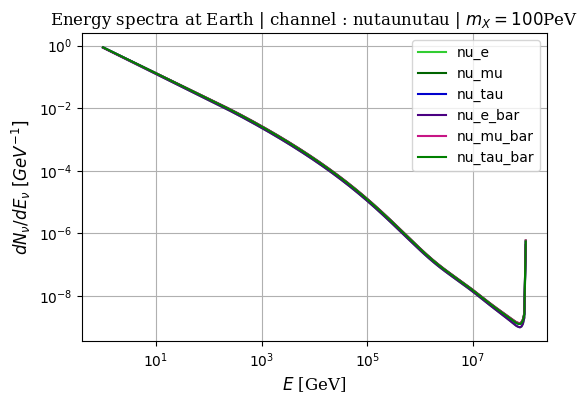

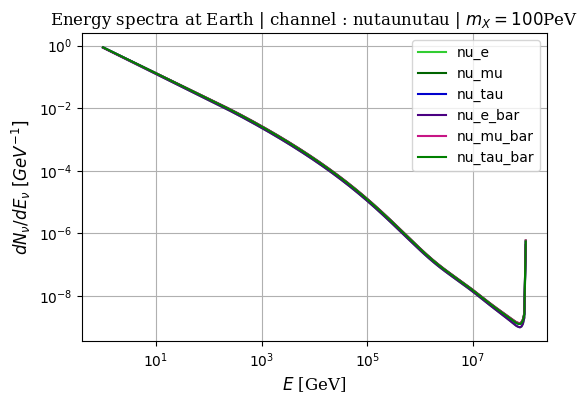

In [15]:
Reco_rate_nutau_NFW100 = Signal_PDF(mass=1e8, channel='nutaunutau',  process='ann', extrapolation=True, galactic_profile=profile.NFW, normalize=True)
Reco_rate_nutau_Burkert100 = Signal_PDF(mass=1e8, channel='nutaunutau',  process='ann', extrapolation=True, galactic_profile=profile.Burkert, normalize=True)

Initial Flux Loading: /usr/local/lib/python3.10/dist-packages/charon-0.1.0-py3.10.egg/charon/data/SpectraEW.hdf5
Initial Flux Loading: /usr/local/lib/python3.10/dist-packages/charon-0.1.0-py3.10.egg/charon/data/SpectraEW.hdf5
Initial Flux Loading: /usr/local/lib/python3.10/dist-packages/charon-0.1.0-py3.10.egg/charon/data/SpectraEW.hdf5
Initial Flux Loading: /usr/local/lib/python3.10/dist-packages/charon-0.1.0-py3.10.egg/charon/data/SpectraEW.hdf5
Initial Flux Loading: /usr/local/lib/python3.10/dist-packages/charon-0.1.0-py3.10.egg/charon/data/SpectraEW.hdf5
Initial Flux Loading: /usr/local/lib/python3.10/dist-packages/charon-0.1.0-py3.10.egg/charon/data/SpectraEW.hdf5


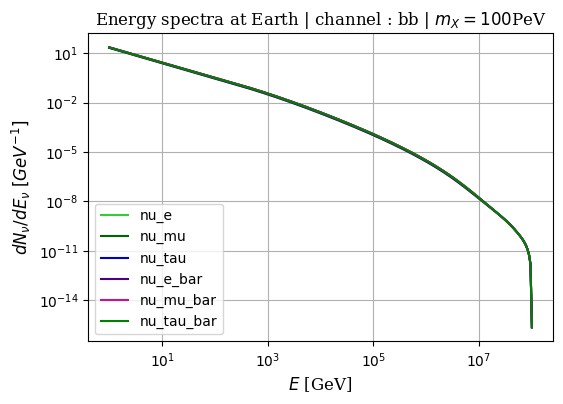

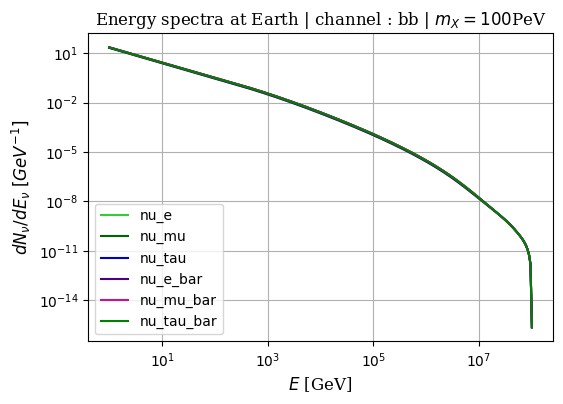

In [16]:
Reco_rate_bb_NFW100 = Signal_PDF(mass=1e8, channel='bb',  process='ann', extrapolation=True, galactic_profile=profile.NFW, normalize=True)
Reco_rate_bb_Burkert100 = Signal_PDF(mass=1e8, channel='bb',  process='ann', extrapolation=True, galactic_profile=profile.Burkert, normalize=True)

Initial Flux Loading: /usr/local/lib/python3.10/dist-packages/charon-0.1.0-py3.10.egg/charon/data/SpectraEW.hdf5
Initial Flux Loading: /usr/local/lib/python3.10/dist-packages/charon-0.1.0-py3.10.egg/charon/data/SpectraEW.hdf5
Initial Flux Loading: /usr/local/lib/python3.10/dist-packages/charon-0.1.0-py3.10.egg/charon/data/SpectraEW.hdf5
Initial Flux Loading: /usr/local/lib/python3.10/dist-packages/charon-0.1.0-py3.10.egg/charon/data/SpectraEW.hdf5
Initial Flux Loading: /usr/local/lib/python3.10/dist-packages/charon-0.1.0-py3.10.egg/charon/data/SpectraEW.hdf5
Initial Flux Loading: /usr/local/lib/python3.10/dist-packages/charon-0.1.0-py3.10.egg/charon/data/SpectraEW.hdf5


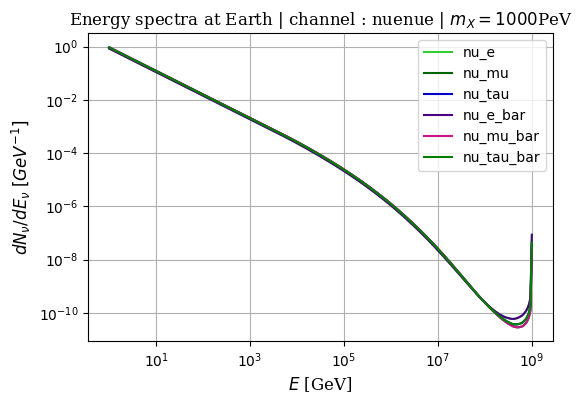

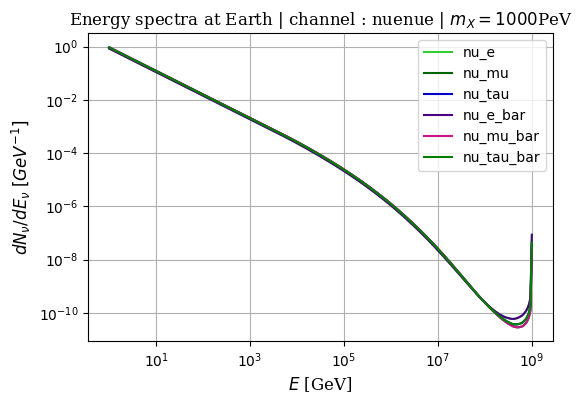

In [17]:
Reco_rate_nue_NFW1000 = Signal_PDF(mass=1e9, channel='nuenue',  process='ann', extrapolation=True, galactic_profile=profile.NFW, normalize=True)
Reco_rate_nue_Burkert1000 = Signal_PDF(mass=1e9, channel='nuenue',  process='ann', extrapolation=True, galactic_profile=profile.Burkert, normalize=True)

Initial Flux Loading: /usr/local/lib/python3.10/dist-packages/charon-0.1.0-py3.10.egg/charon/data/SpectraEW.hdf5
Initial Flux Loading: /usr/local/lib/python3.10/dist-packages/charon-0.1.0-py3.10.egg/charon/data/SpectraEW.hdf5
Initial Flux Loading: /usr/local/lib/python3.10/dist-packages/charon-0.1.0-py3.10.egg/charon/data/SpectraEW.hdf5
Initial Flux Loading: /usr/local/lib/python3.10/dist-packages/charon-0.1.0-py3.10.egg/charon/data/SpectraEW.hdf5
Initial Flux Loading: /usr/local/lib/python3.10/dist-packages/charon-0.1.0-py3.10.egg/charon/data/SpectraEW.hdf5
Initial Flux Loading: /usr/local/lib/python3.10/dist-packages/charon-0.1.0-py3.10.egg/charon/data/SpectraEW.hdf5


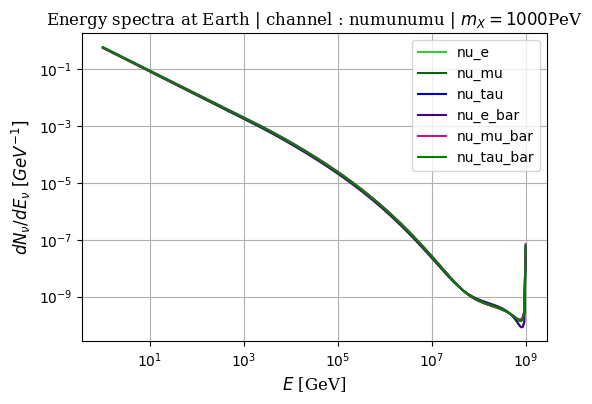

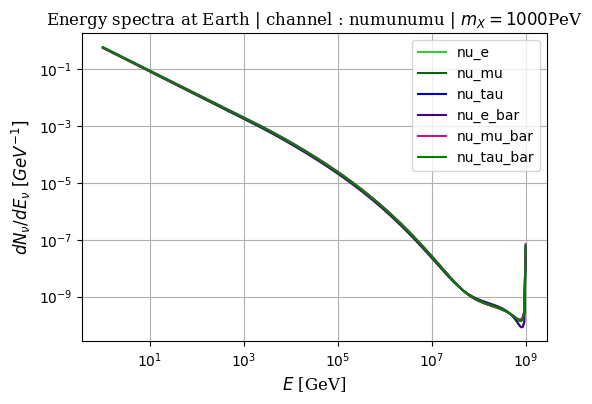

In [18]:
Reco_rate_numu_NFW1000 = Signal_PDF(mass=1e9, channel='numunumu',  process='ann', extrapolation=True, galactic_profile=profile.NFW, normalize=True)
Reco_rate_numu_Burkert1000 = Signal_PDF(mass=1e9, channel='numunumu',  process='ann', extrapolation=True, galactic_profile=profile.Burkert, normalize=True)

Initial Flux Loading: /usr/local/lib/python3.10/dist-packages/charon-0.1.0-py3.10.egg/charon/data/SpectraEW.hdf5
Initial Flux Loading: /usr/local/lib/python3.10/dist-packages/charon-0.1.0-py3.10.egg/charon/data/SpectraEW.hdf5
Initial Flux Loading: /usr/local/lib/python3.10/dist-packages/charon-0.1.0-py3.10.egg/charon/data/SpectraEW.hdf5
Initial Flux Loading: /usr/local/lib/python3.10/dist-packages/charon-0.1.0-py3.10.egg/charon/data/SpectraEW.hdf5
Initial Flux Loading: /usr/local/lib/python3.10/dist-packages/charon-0.1.0-py3.10.egg/charon/data/SpectraEW.hdf5
Initial Flux Loading: /usr/local/lib/python3.10/dist-packages/charon-0.1.0-py3.10.egg/charon/data/SpectraEW.hdf5


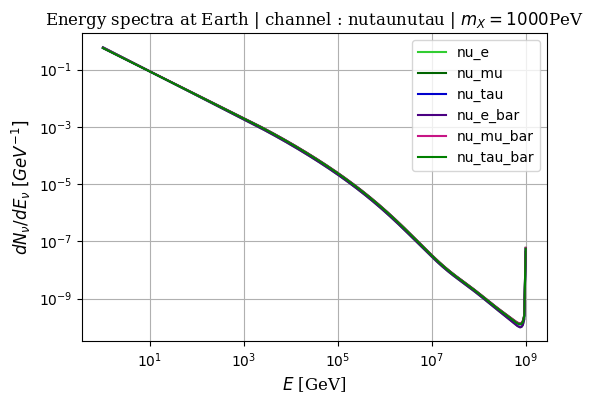

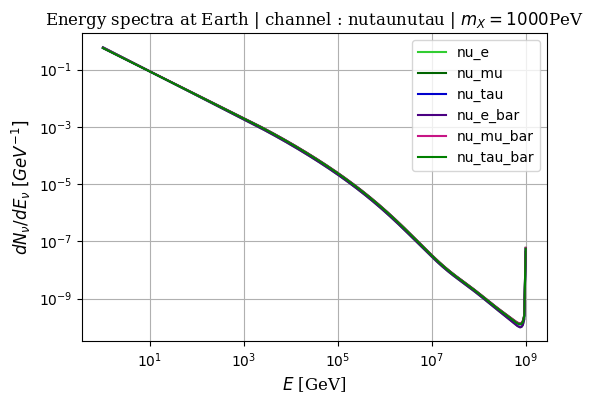

In [19]:
Reco_rate_nutau_NFW1000 = Signal_PDF(mass=1e9, channel='nutaunutau',  process='ann', extrapolation=True, galactic_profile=profile.NFW, normalize=True)
Reco_rate_nutau_Burkert1000 = Signal_PDF(mass=1e9, channel='nutaunutau',  process='ann', extrapolation=True, galactic_profile=profile.Burkert, normalize=True)

Initial Flux Loading: /usr/local/lib/python3.10/dist-packages/charon-0.1.0-py3.10.egg/charon/data/SpectraEW.hdf5
Initial Flux Loading: /usr/local/lib/python3.10/dist-packages/charon-0.1.0-py3.10.egg/charon/data/SpectraEW.hdf5
Initial Flux Loading: /usr/local/lib/python3.10/dist-packages/charon-0.1.0-py3.10.egg/charon/data/SpectraEW.hdf5
Initial Flux Loading: /usr/local/lib/python3.10/dist-packages/charon-0.1.0-py3.10.egg/charon/data/SpectraEW.hdf5
Initial Flux Loading: /usr/local/lib/python3.10/dist-packages/charon-0.1.0-py3.10.egg/charon/data/SpectraEW.hdf5
Initial Flux Loading: /usr/local/lib/python3.10/dist-packages/charon-0.1.0-py3.10.egg/charon/data/SpectraEW.hdf5


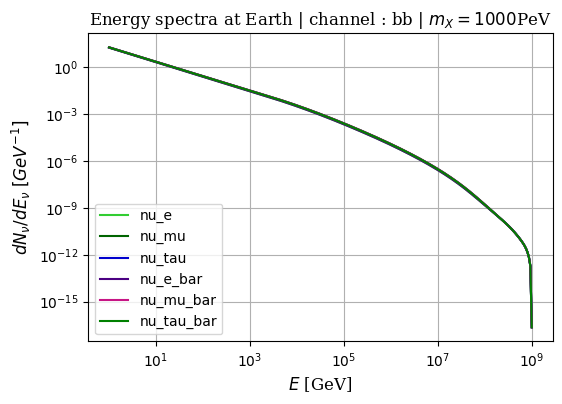

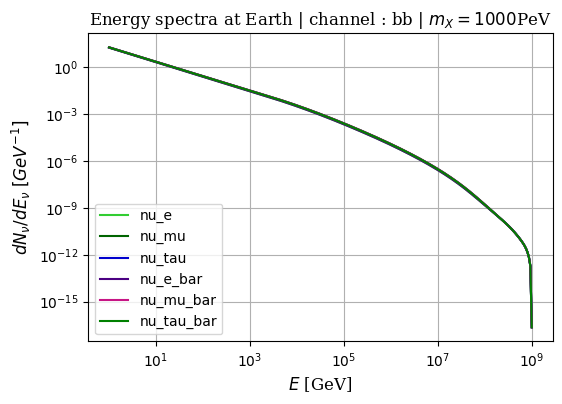

In [20]:
Reco_rate_bb_NFW1000 = Signal_PDF(mass=1e9, channel='bb',  process='ann', extrapolation=True, galactic_profile=profile.NFW, normalize=True)
Reco_rate_bb_Burkert1000 = Signal_PDF(mass=1e9, channel='bb',  process='ann', extrapolation=True, galactic_profile=profile.Burkert, normalize=True)

In [21]:
resp_matrix_data = np.load('/home/dvaldenaire/Python/Analysis/Response matrix/Resp_MC1122_logE.pkl',allow_pickle=True, encoding="latin1")
Reco_mass_edges = np.log10(resp_matrix_data['Bin']['reco_energy_edges'])
Reco_theta_edges = resp_matrix_data['Bin']['reco_psi_edges']

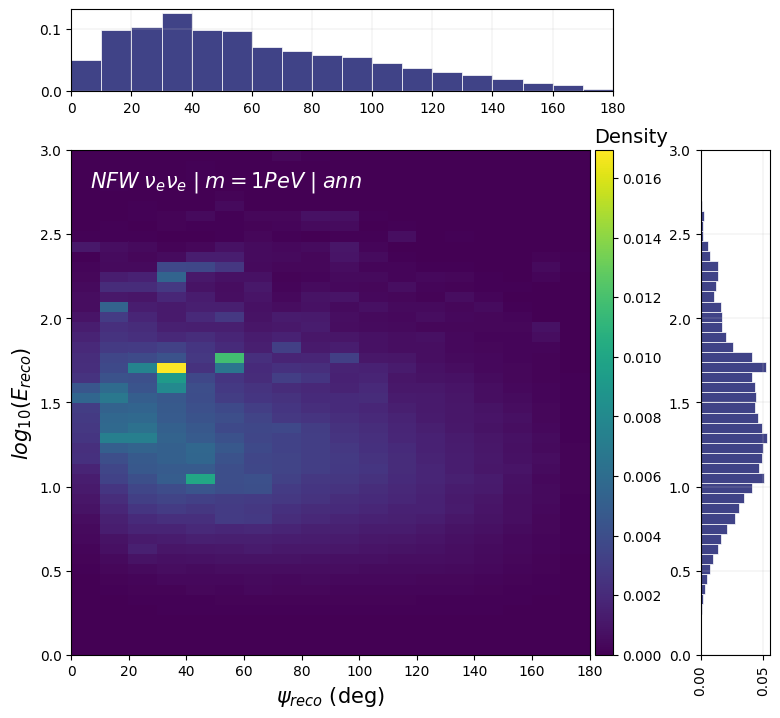

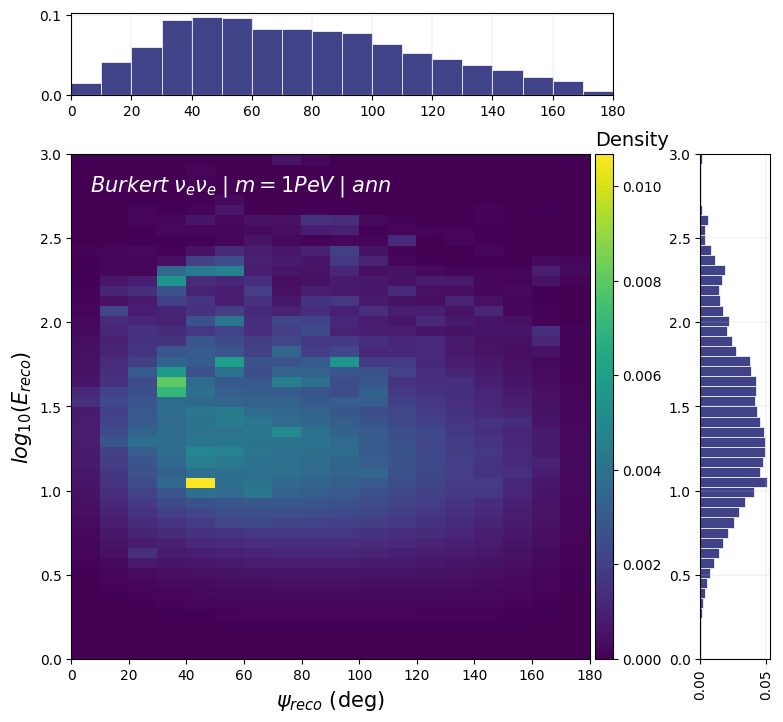

In [22]:
plot_projections(Reco_rate_nue_NFW1,(Reco_theta_edges,Reco_mass_edges),'$\psi_{reco}$ (deg)','$log_{10}(E_{reco})$',r'$NFW \; \nu_e \nu_e \; | \; m = 1 PeV \; | \; ann$')
plot_projections(Reco_rate_nue_Burkert1,(Reco_theta_edges,Reco_mass_edges),'$\psi_{reco}$ (deg)','$log_{10}(E_{reco})$',r'$Burkert \; \nu_e \nu_e \; | \; m = 1 PeV \; | \; ann$')

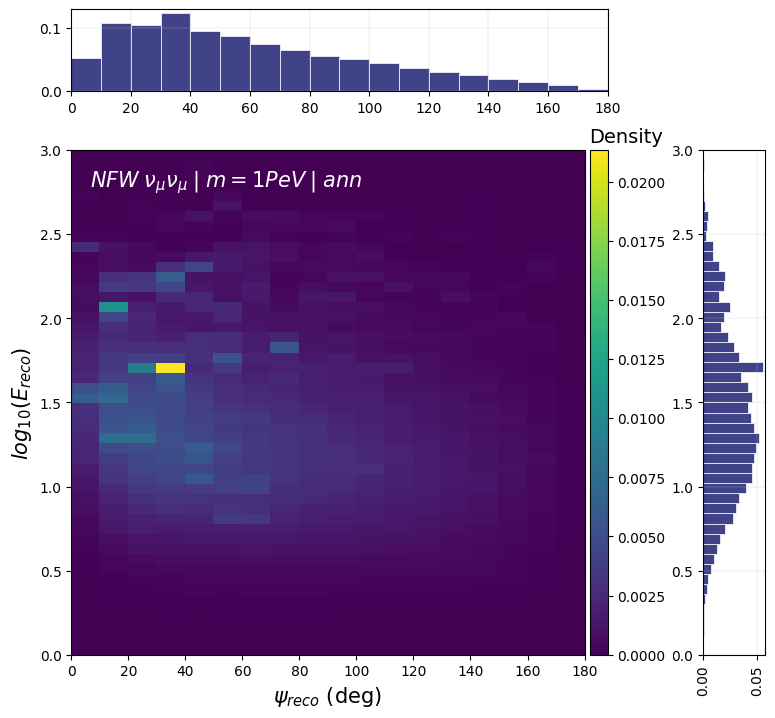

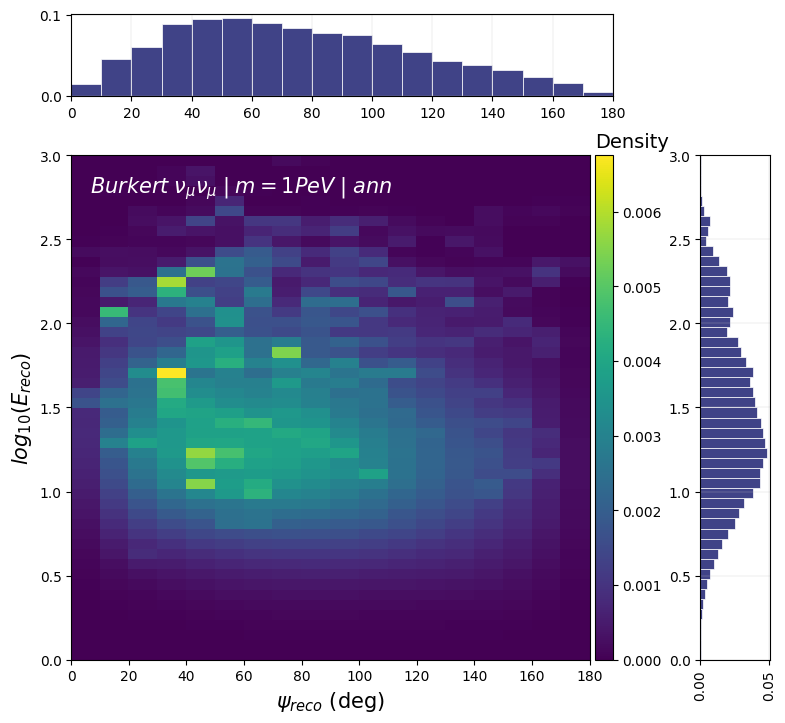

In [23]:
plot_projections(Reco_rate_numu_NFW1,(Reco_theta_edges,Reco_mass_edges),'$\psi_{reco}$ (deg)','$log_{10}(E_{reco})$', r'$NFW \; \nu_\mu \nu_\mu \; | \; m = 1 PeV \; | \; ann$')
plot_projections(Reco_rate_numu_Burkert1,(Reco_theta_edges,Reco_mass_edges),'$\psi_{reco}$ (deg)','$log_{10}(E_{reco})$', r'$Burkert \; \nu_\mu \nu_\mu \; | \; m = 1 PeV \; | \; ann$')

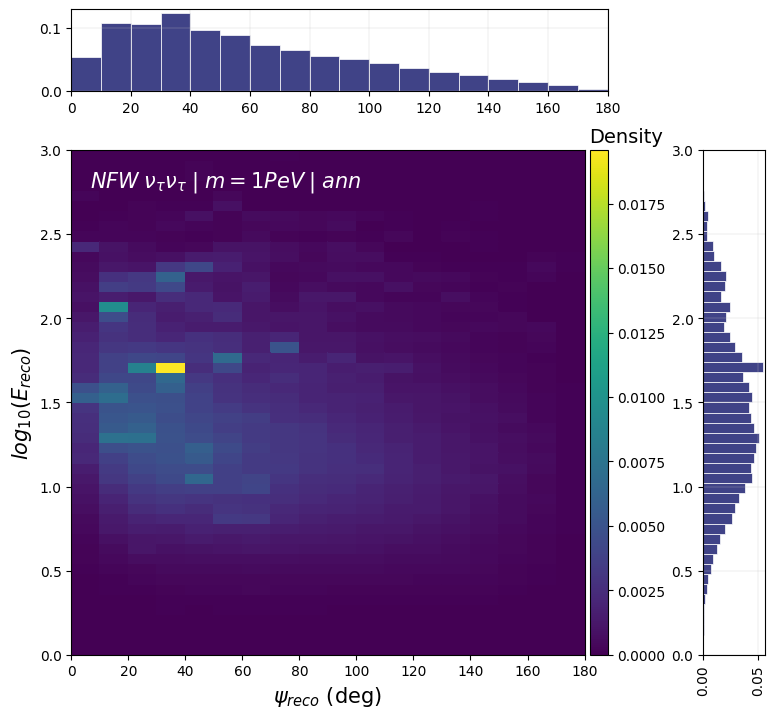

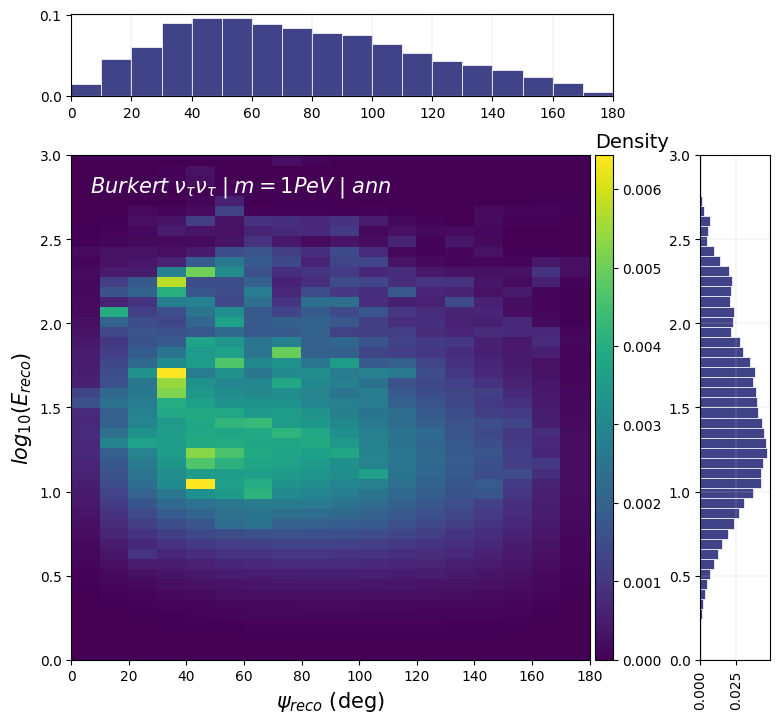

In [24]:
plot_projections(Reco_rate_nutau_NFW1,(Reco_theta_edges,Reco_mass_edges),'$\psi_{reco}$ (deg)','$log_{10}(E_{reco})$',r'$NFW \; \nu_\tau \nu_\tau \; | \; m = 1 PeV \; | \; ann$')
plot_projections(Reco_rate_nutau_Burkert1,(Reco_theta_edges,Reco_mass_edges),'$\psi_{reco}$ (deg)','$log_{10}(E_{reco})$',r'$Burkert \; \nu_\tau \nu_\tau \; | \; m = 1 PeV \; | \; ann$')

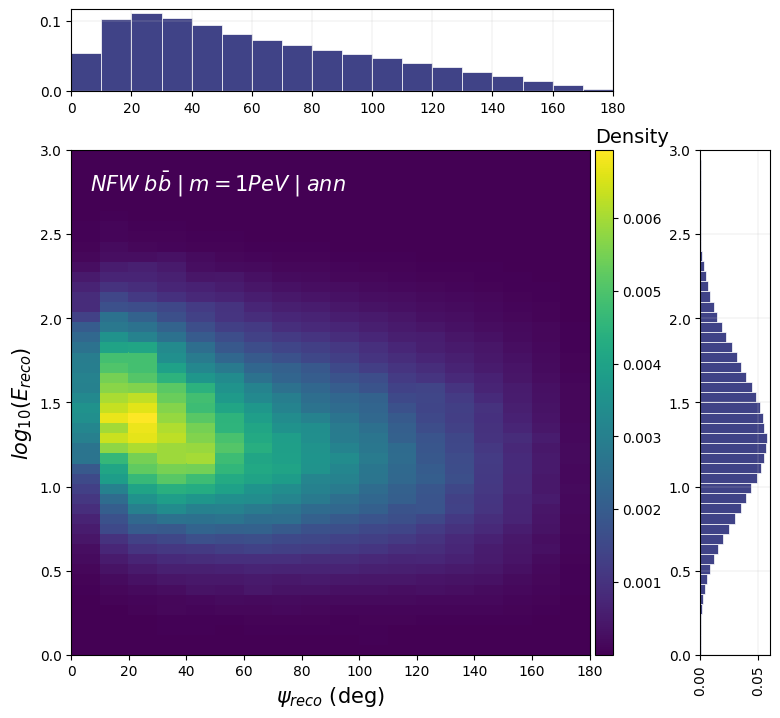

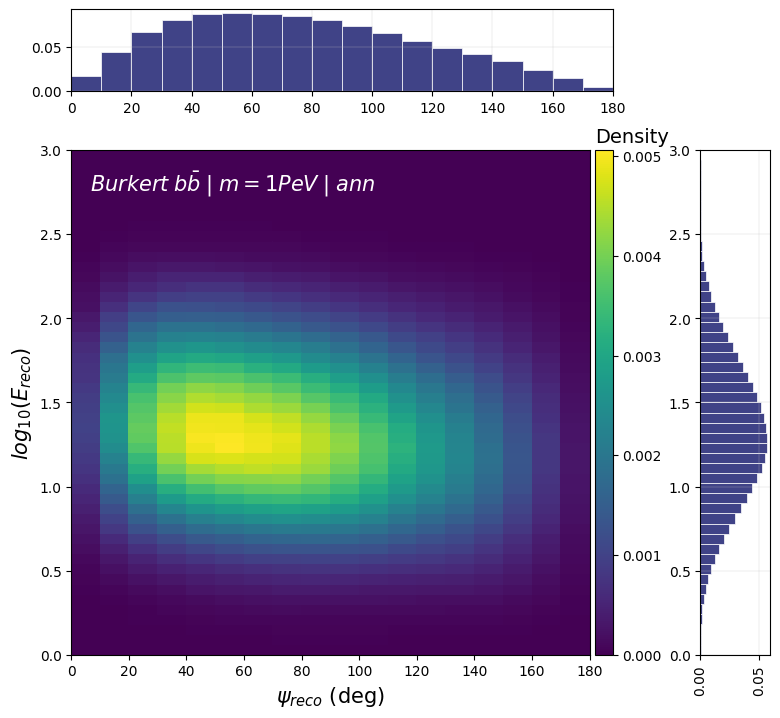

In [25]:
plot_projections(Reco_rate_bb_NFW1,(Reco_theta_edges,Reco_mass_edges),'$\psi_{reco}$ (deg)','$log_{10}(E_{reco})$',r'$NFW \; b \bar{b} \; | \; m = 1 PeV \; | \; ann$')
plot_projections(Reco_rate_bb_Burkert1,(Reco_theta_edges,Reco_mass_edges),'$\psi_{reco}$ (deg)','$log_{10}(E_{reco})$',r'$Burkert \; b \bar{b} \; | \; m = 1 PeV \; | \; ann$')

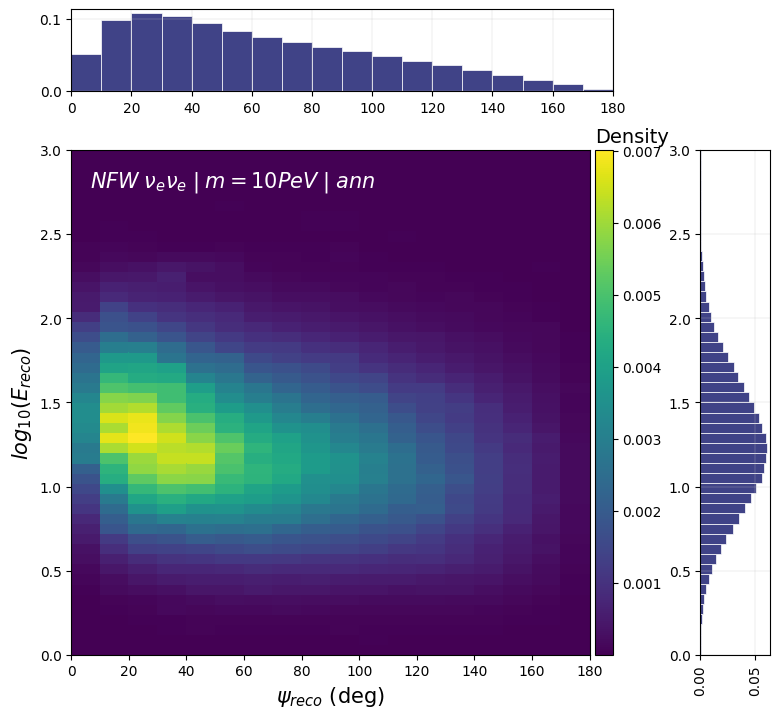

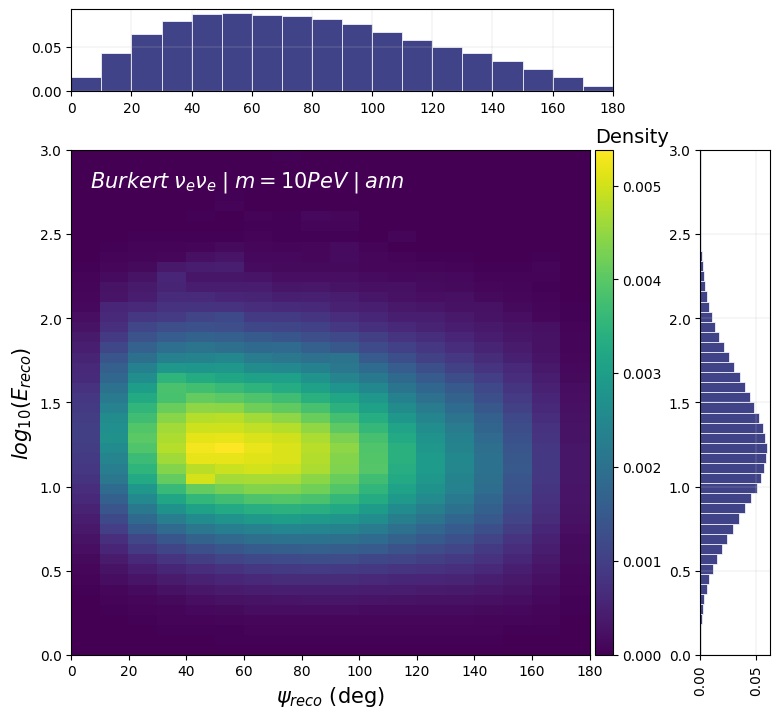

In [26]:
plot_projections(Reco_rate_nue_NFW,(Reco_theta_edges,Reco_mass_edges),'$\psi_{reco}$ (deg)','$log_{10}(E_{reco})$',r'$NFW \; \nu_e \nu_e \; | \; m = 10 PeV \; | \; ann$')
plot_projections(Reco_rate_nue_Burkert,(Reco_theta_edges,Reco_mass_edges),'$\psi_{reco}$ (deg)','$log_{10}(E_{reco})$',r'$Burkert \; \nu_e \nu_e \; | \; m = 10 PeV \; | \; ann$')

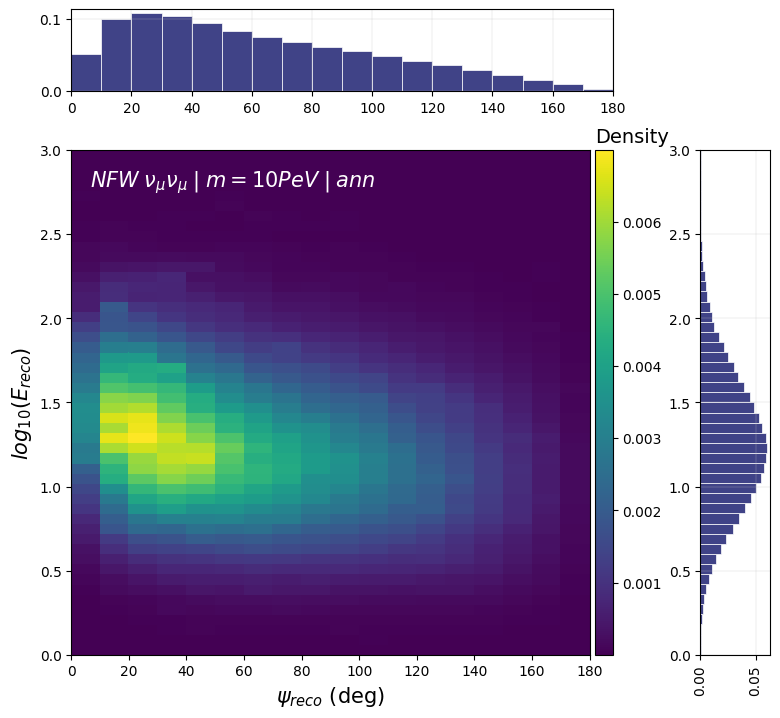

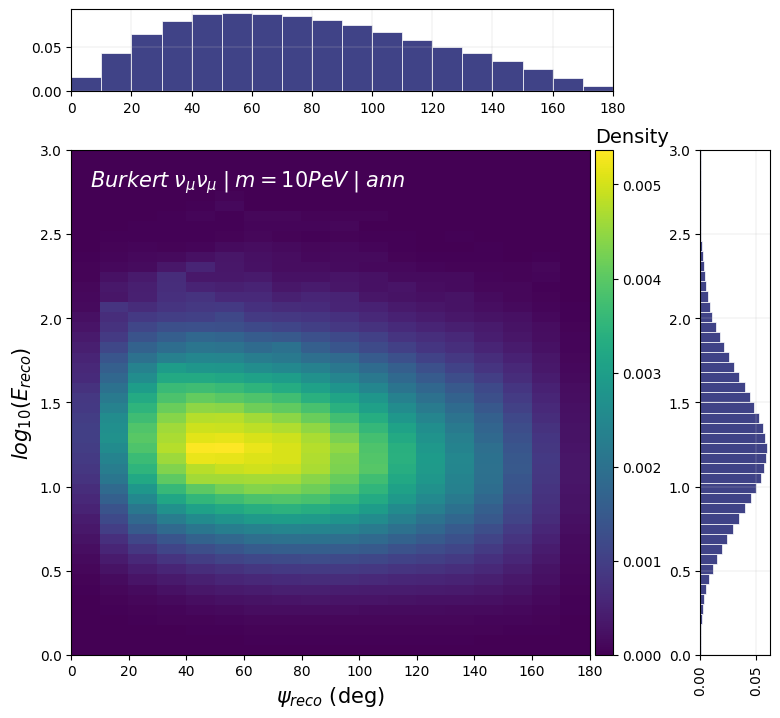

In [27]:
plot_projections(Reco_rate_numu_NFW,(Reco_theta_edges,Reco_mass_edges),'$\psi_{reco}$ (deg)','$log_{10}(E_{reco})$',r'$NFW \; \nu_\mu \nu_\mu \; | \; m = 10 PeV \; | \; ann$')
plot_projections(Reco_rate_numu_Burkert,(Reco_theta_edges,Reco_mass_edges),'$\psi_{reco}$ (deg)','$log_{10}(E_{reco})$',r'$Burkert \; \nu_\mu \nu_\mu \; | \; m = 10 PeV \; | \; ann$')

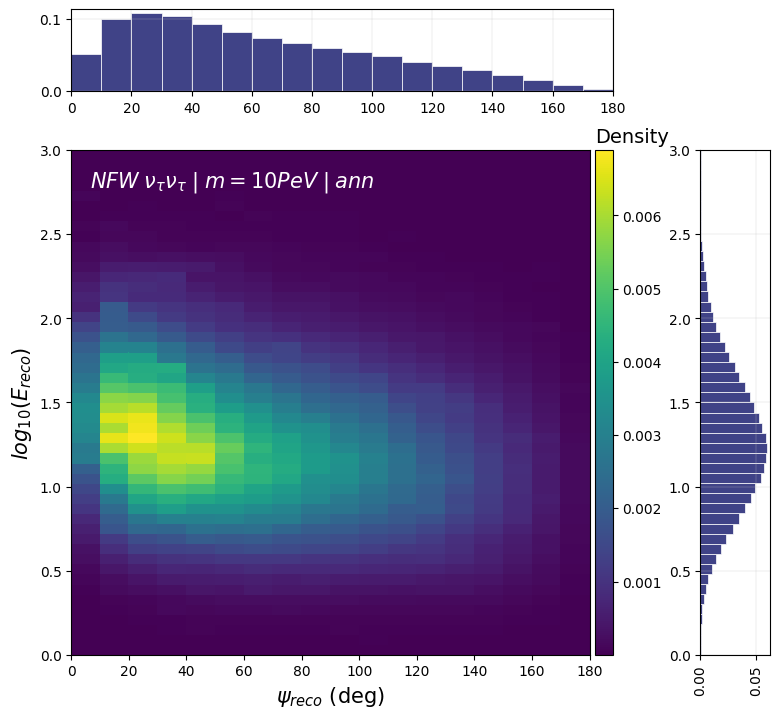

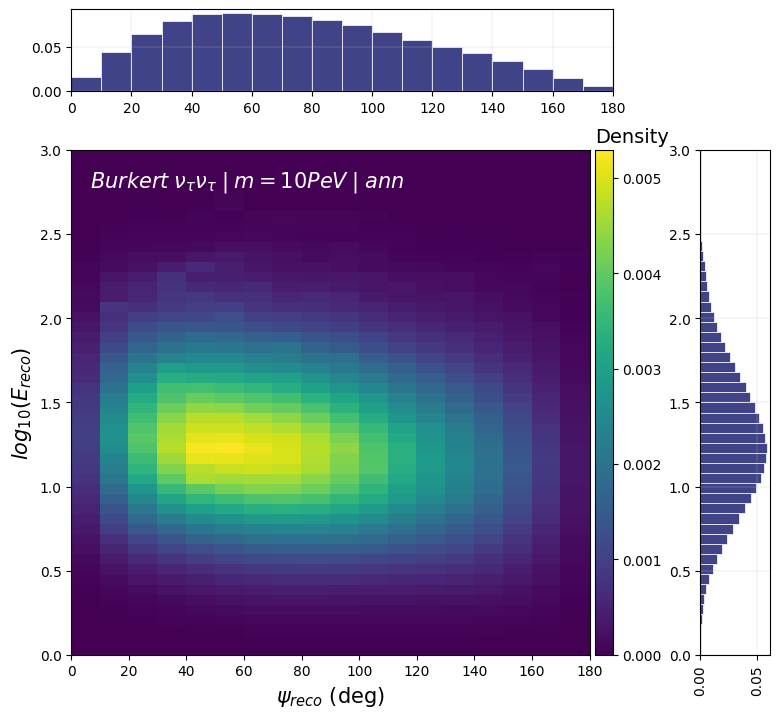

In [28]:
plot_projections(Reco_rate_nutau_NFW,(Reco_theta_edges,Reco_mass_edges),'$\psi_{reco}$ (deg)','$log_{10}(E_{reco})$',r'$NFW \; \nu_\tau \nu_\tau \; | \; m = 10 PeV \; | \; ann$')
plot_projections(Reco_rate_nutau_Burkert,(Reco_theta_edges,Reco_mass_edges),'$\psi_{reco}$ (deg)','$log_{10}(E_{reco})$',r'$Burkert \; \nu_\tau \nu_\tau \; | \; m = 10 PeV \; | \; ann$')

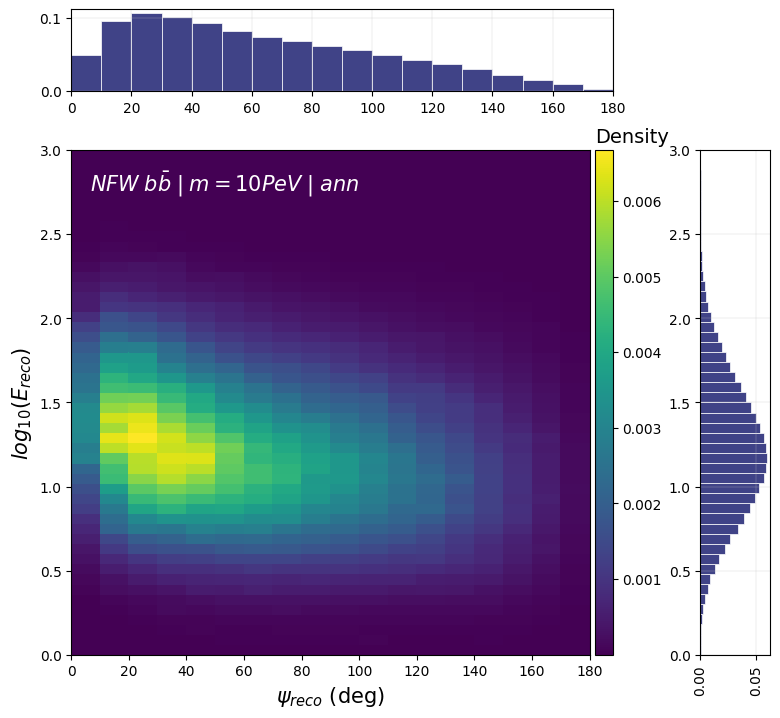

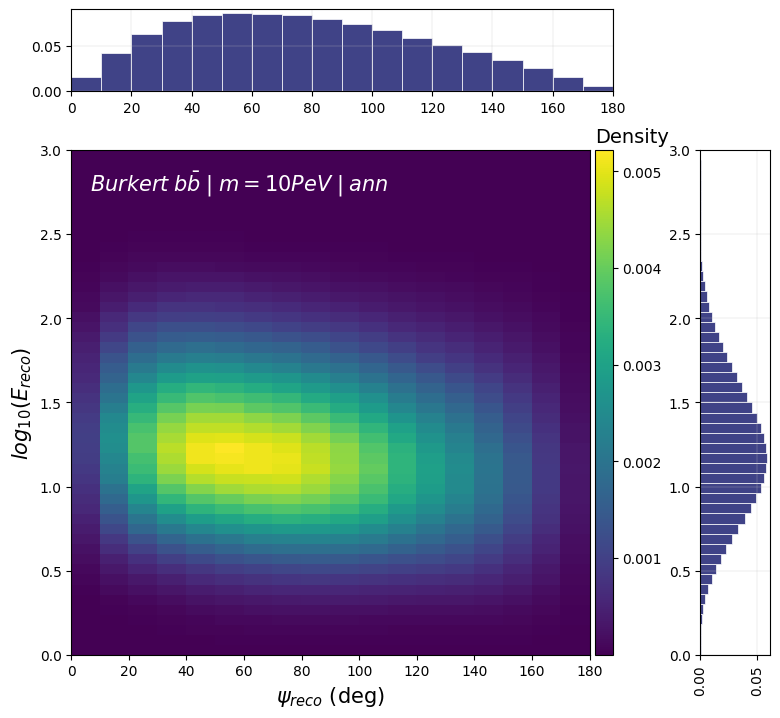

In [29]:
plot_projections(Reco_rate_bb_NFW,(Reco_theta_edges,Reco_mass_edges),'$\psi_{reco}$ (deg)','$log_{10}(E_{reco})$',r'$NFW \; b \bar{b} \; | \; m = 10 PeV \; | \; ann$')
plot_projections(Reco_rate_bb_Burkert,(Reco_theta_edges,Reco_mass_edges),'$\psi_{reco}$ (deg)','$log_{10}(E_{reco})$',r'$Burkert \; b \bar{b} \; | \; m = 10 PeV \; | \; ann$')

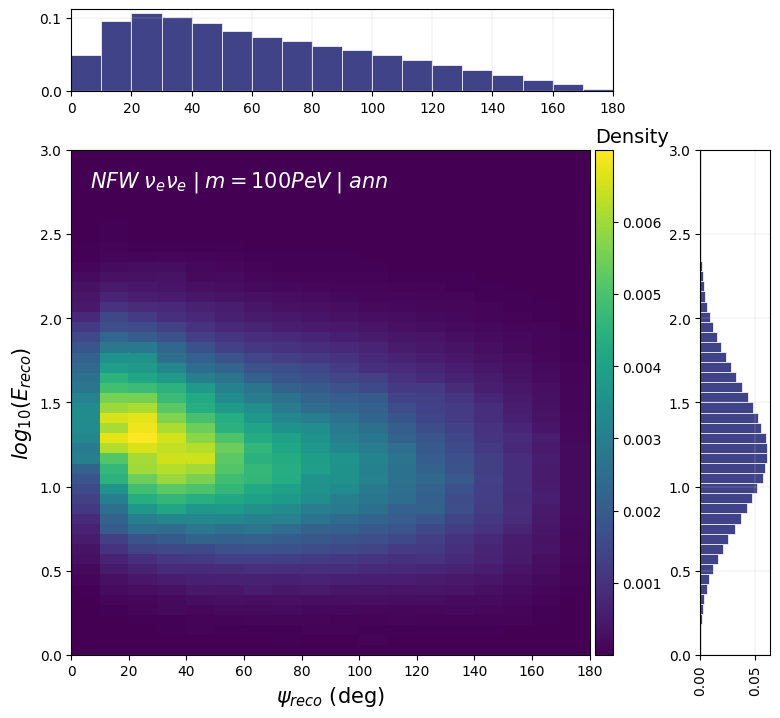

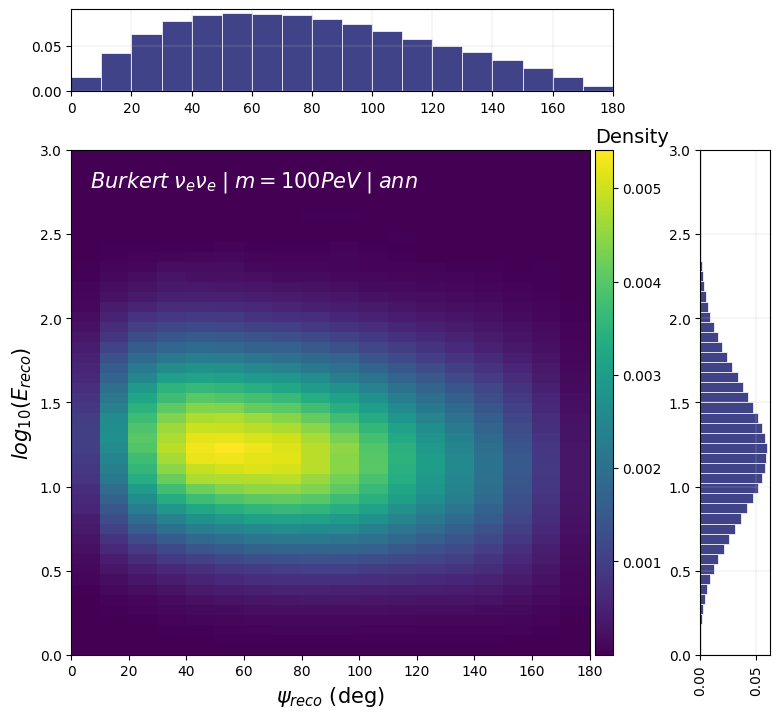

In [30]:
plot_projections(Reco_rate_nue_NFW100,(Reco_theta_edges,Reco_mass_edges),'$\psi_{reco}$ (deg)','$log_{10}(E_{reco})$',r'$NFW \; \nu_e \nu_e \; | \; m = 100 PeV \; | \; ann$')
plot_projections(Reco_rate_nue_Burkert100,(Reco_theta_edges,Reco_mass_edges),'$\psi_{reco}$ (deg)','$log_{10}(E_{reco})$',r'$Burkert \; \nu_e \nu_e \; | \; m = 100 PeV \; | \; ann$')

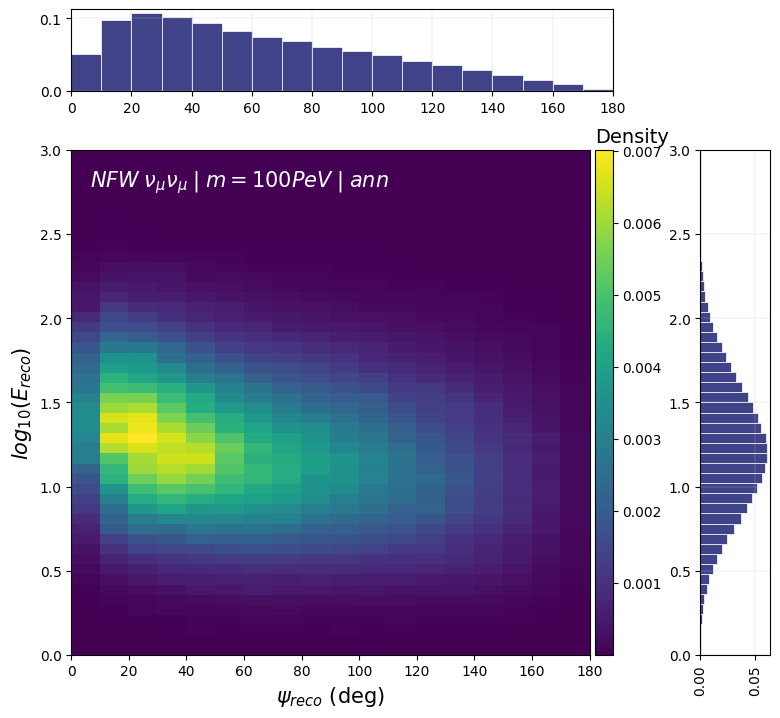

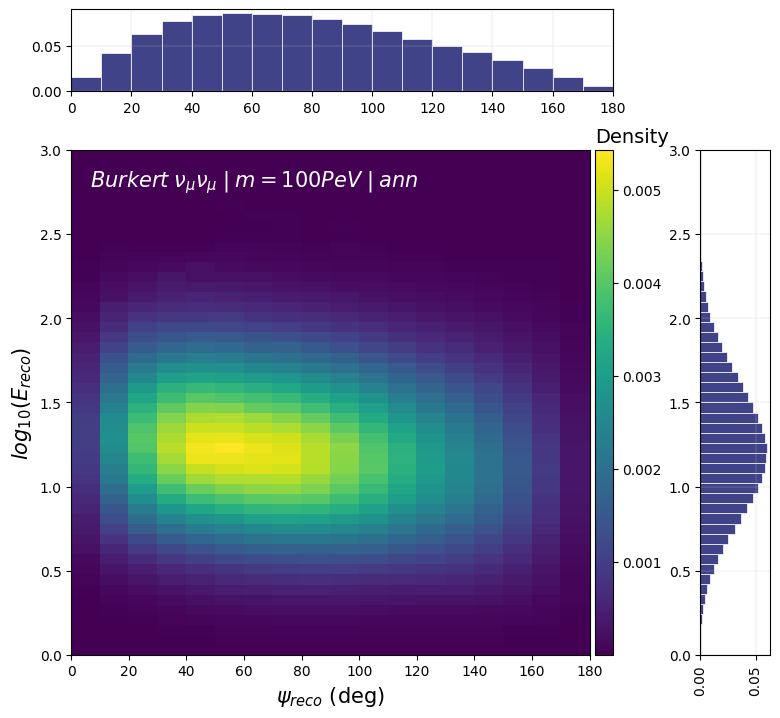

In [31]:
plot_projections(Reco_rate_numu_NFW100,(Reco_theta_edges,Reco_mass_edges),'$\psi_{reco}$ (deg)','$log_{10}(E_{reco})$',r'$NFW \; \nu_\mu \nu_\mu \; | \; m = 100 PeV \; | \; ann$')
plot_projections(Reco_rate_numu_Burkert100,(Reco_theta_edges,Reco_mass_edges),'$\psi_{reco}$ (deg)','$log_{10}(E_{reco})$',r'$Burkert \; \nu_\mu \nu_\mu \; | \; m = 100 PeV \; | \; ann$')

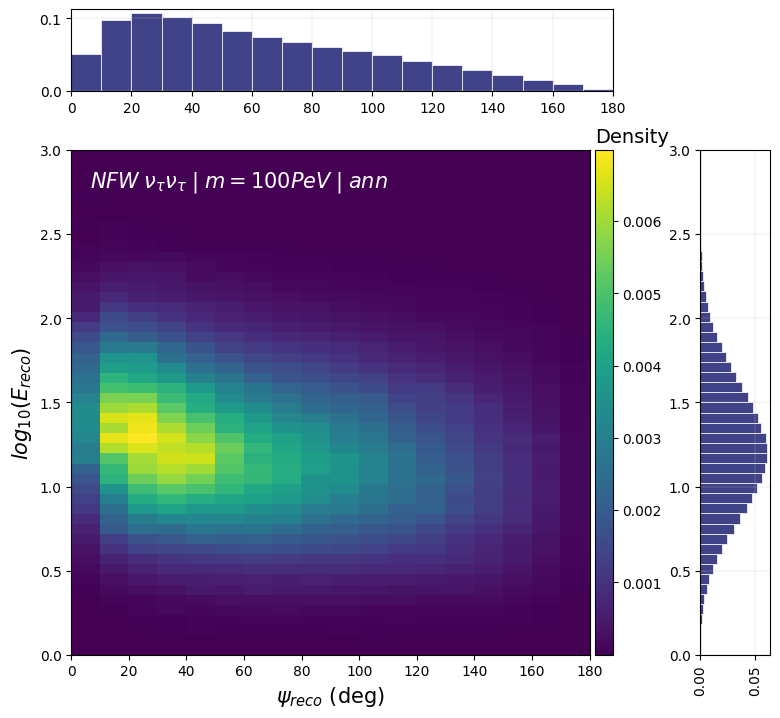

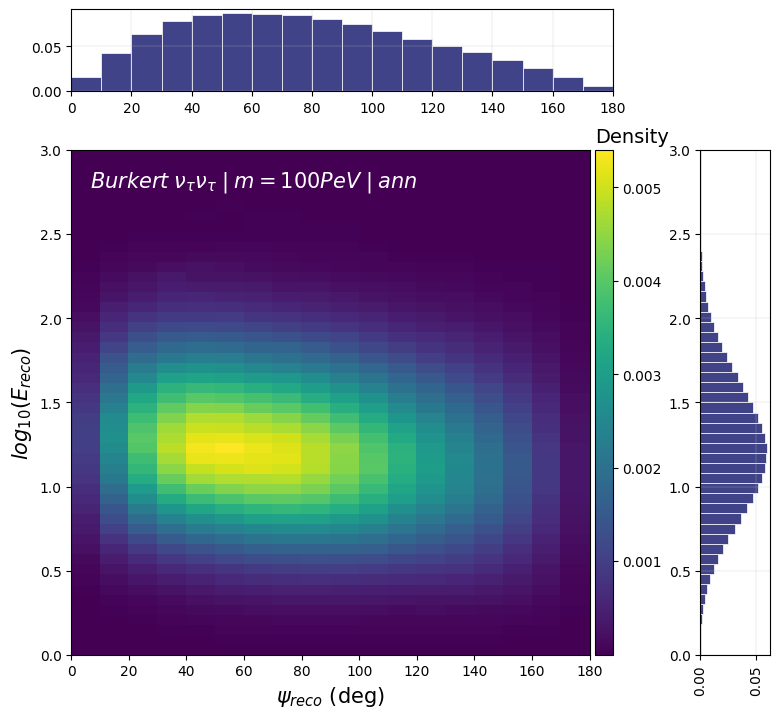

In [32]:
plot_projections(Reco_rate_nutau_NFW100,(Reco_theta_edges,Reco_mass_edges),'$\psi_{reco}$ (deg)','$log_{10}(E_{reco})$',r'$NFW \; \nu_\tau \nu_\tau \; | \; m = 100 PeV \; | \; ann$')
plot_projections(Reco_rate_nutau_Burkert100,(Reco_theta_edges,Reco_mass_edges),'$\psi_{reco}$ (deg)','$log_{10}(E_{reco})$',r'$Burkert \; \nu_\tau \nu_\tau \; | \; m = 100 PeV \; | \; ann$')

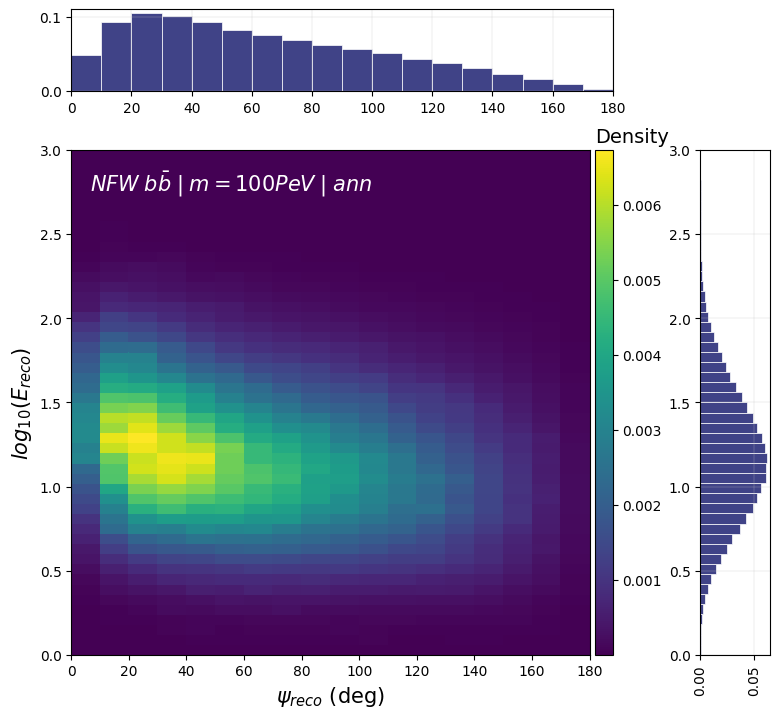

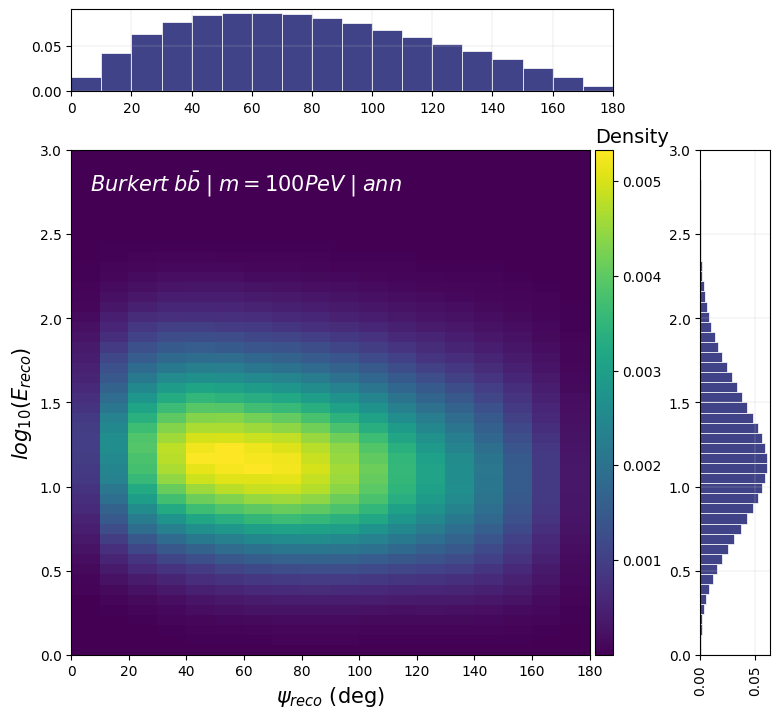

In [33]:
plot_projections(Reco_rate_bb_NFW100,(Reco_theta_edges,Reco_mass_edges),'$\psi_{reco}$ (deg)','$log_{10}(E_{reco})$',r'$NFW \; b \bar{b} \; | \; m = 100 PeV \; | \; ann$')
plot_projections(Reco_rate_bb_Burkert100,(Reco_theta_edges,Reco_mass_edges),'$\psi_{reco}$ (deg)','$log_{10}(E_{reco})$',r'$Burkert \; b \bar{b} \; | \; m = 100 PeV \; | \; ann$')

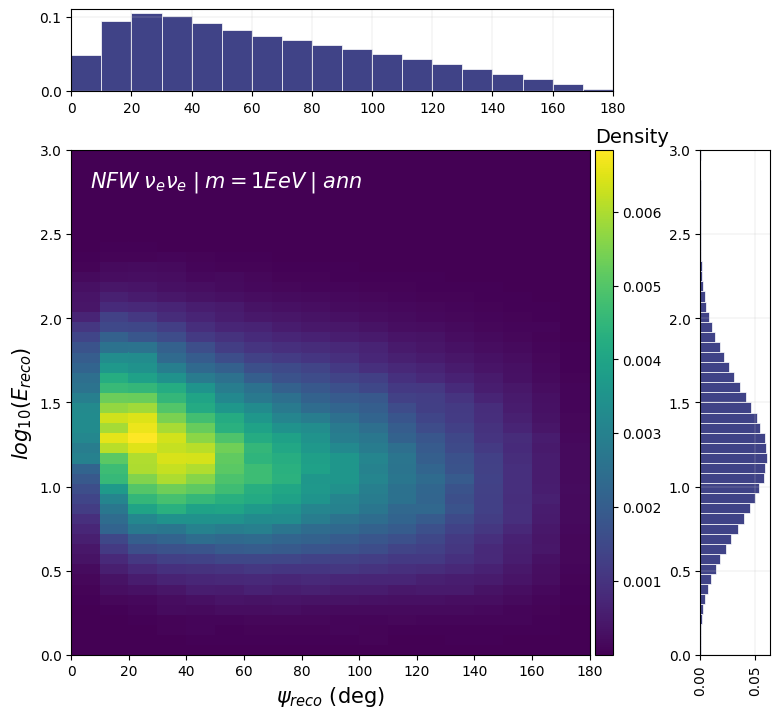

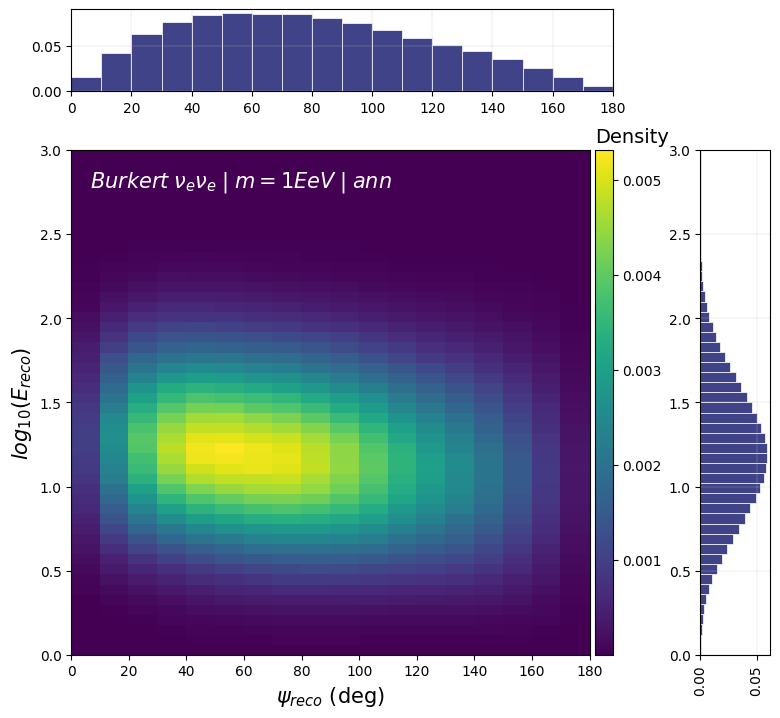

In [34]:
plot_projections(Reco_rate_nue_NFW1000,(Reco_theta_edges,Reco_mass_edges),'$\psi_{reco}$ (deg)','$log_{10}(E_{reco})$',r'$NFW \; \nu_e \nu_e \; | \; m = 1 EeV \; | \; ann$')
plot_projections(Reco_rate_nue_Burkert1000,(Reco_theta_edges,Reco_mass_edges),'$\psi_{reco}$ (deg)','$log_{10}(E_{reco})$',r'$Burkert \; \nu_e \nu_e \; | \; m = 1 EeV \; | \; ann$')

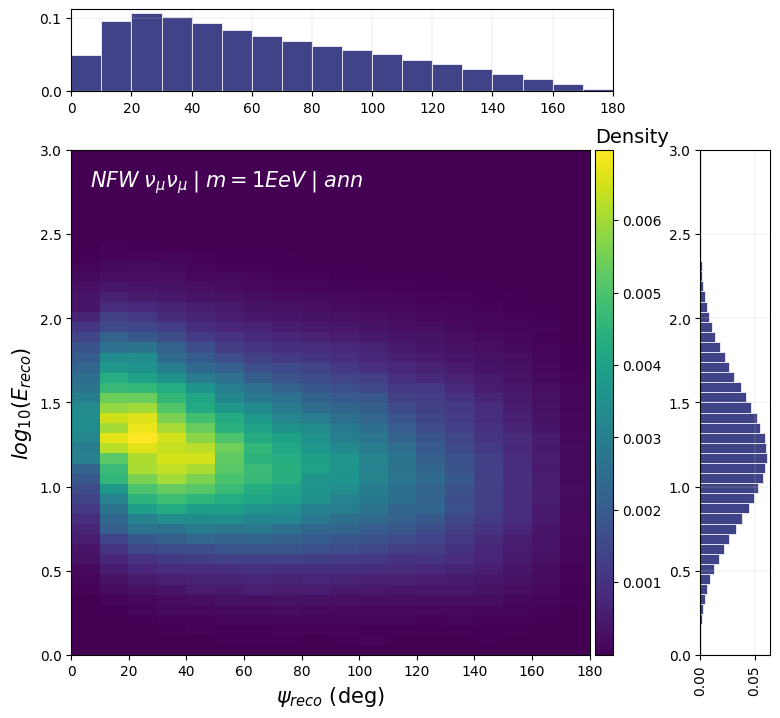

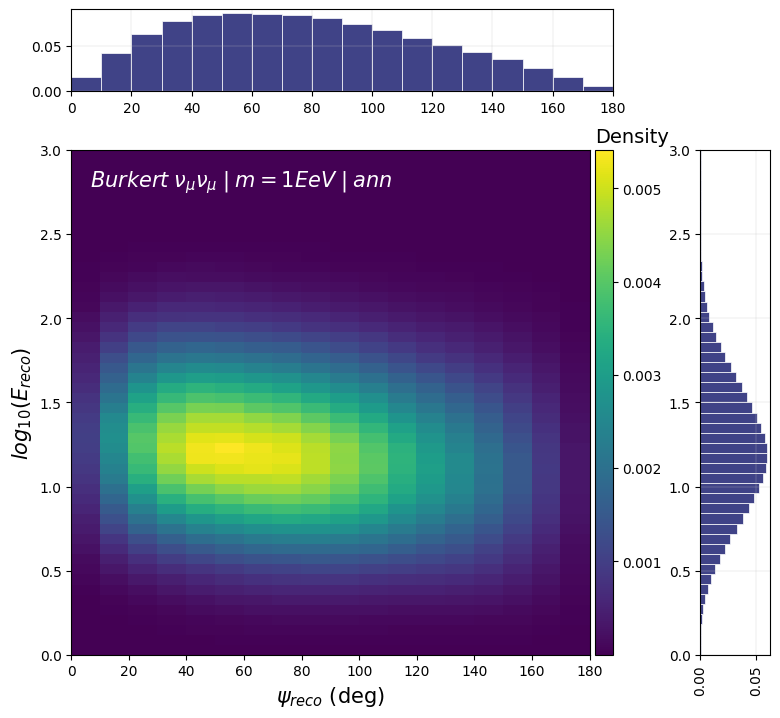

In [35]:
plot_projections(Reco_rate_numu_NFW1000,(Reco_theta_edges,Reco_mass_edges),'$\psi_{reco}$ (deg)','$log_{10}(E_{reco})$',r'$NFW \; \nu_\mu \nu_\mu \; | \; m = 1 EeV \; | \; ann$')
plot_projections(Reco_rate_numu_Burkert1000,(Reco_theta_edges,Reco_mass_edges),'$\psi_{reco}$ (deg)','$log_{10}(E_{reco})$',r'$Burkert \; \nu_\mu \nu_\mu \; | \; m = 1 EeV \; | \; ann$')

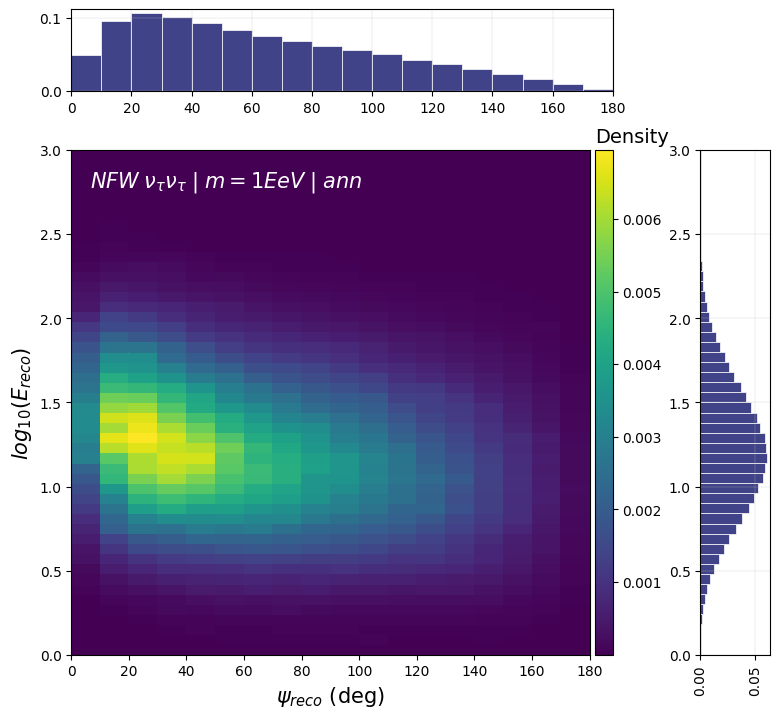

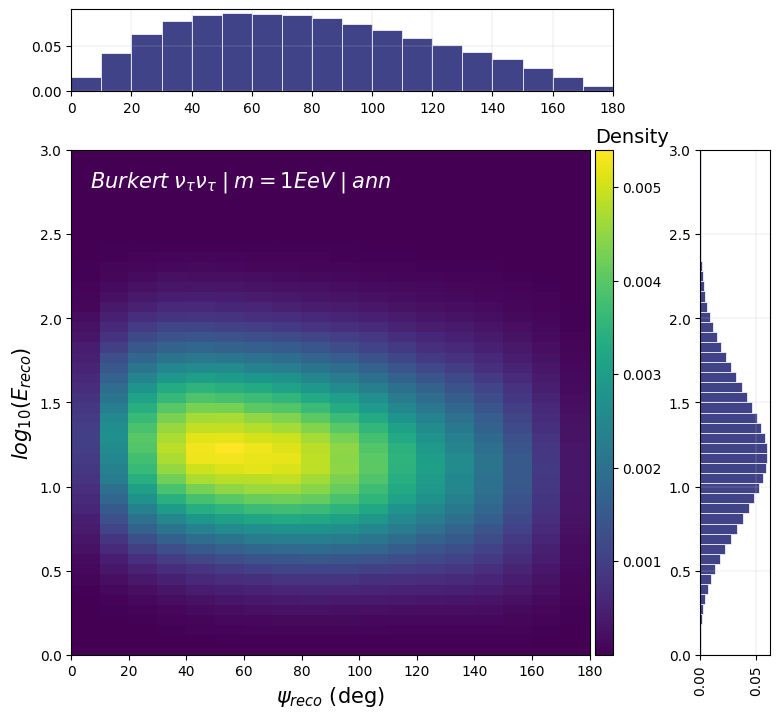

In [36]:
plot_projections(Reco_rate_nutau_NFW1000,(Reco_theta_edges,Reco_mass_edges),'$\psi_{reco}$ (deg)','$log_{10}(E_{reco})$',r'$NFW \; \nu_\tau \nu_\tau \; | \; m = 1 EeV \; | \; ann$')
plot_projections(Reco_rate_nutau_Burkert1000,(Reco_theta_edges,Reco_mass_edges),'$\psi_{reco}$ (deg)','$log_{10}(E_{reco})$',r'$Burkert \; \nu_\tau \nu_\tau \; | \; m = 1 EeV \; | \; ann$')

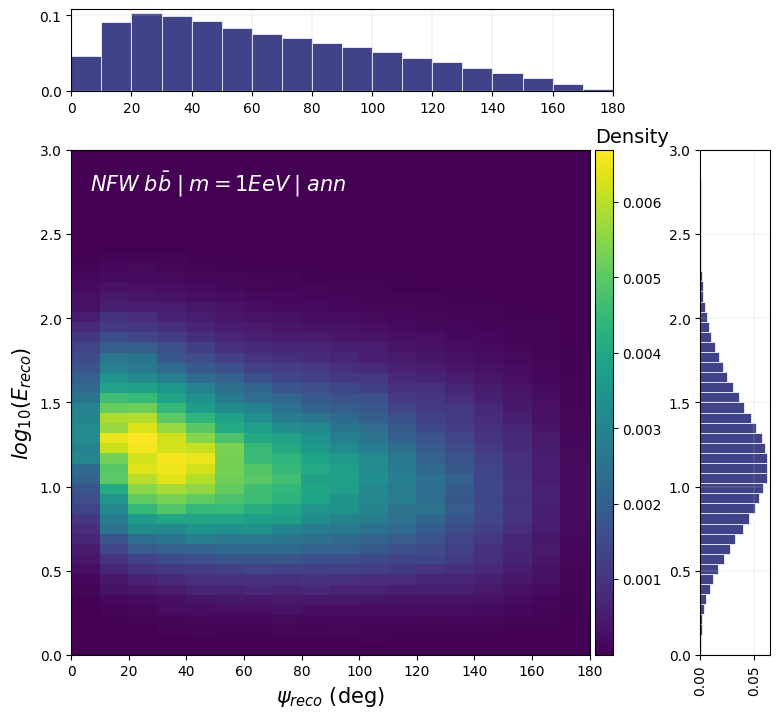

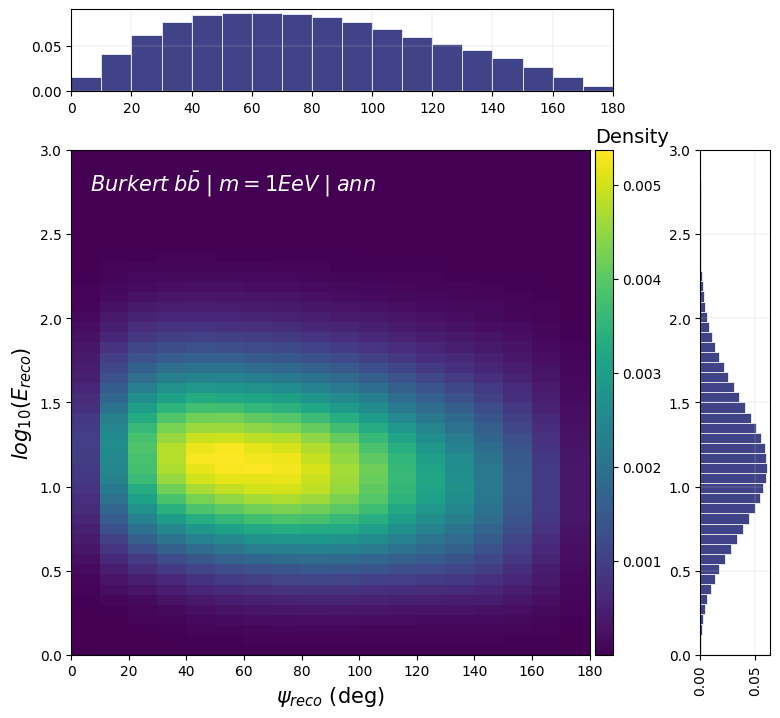

In [37]:
plot_projections(Reco_rate_bb_NFW1000,(Reco_theta_edges,Reco_mass_edges),'$\psi_{reco}$ (deg)','$log_{10}(E_{reco})$',r'$NFW \; b \bar{b} \; | \; m = 1 EeV \; | \; ann$')
plot_projections(Reco_rate_bb_Burkert1000,(Reco_theta_edges,Reco_mass_edges),'$\psi_{reco}$ (deg)','$log_{10}(E_{reco})$',r'$Burkert \; b \bar{b} \; | \; m = 1 EeV \; | \; ann$')